<a name="1common."></a>
## Содержание:
* [Шаг 1. Загрузим данные и подготовимся к их анализу](#1.0)
* [Шаг 2. Предобработка данных](#2.0)
     - [2.1 Баг-репорт №1](#2.1)
     - [2.2 Баг-репорт №2](#2.2)
* [Шаг 3. Исследовательский анализ.](#3.0)
     - [3.1 Общее исследование](#3.1)
     - [3.2 Первый сегмент покупателей vip-клиенты](#3.2)
     - [3.3 Второй сегмент покупателей mass-клиенты](#3.3)
     - [3.4 Посмотрим на зависимость покупок от дня недели и времени суток](#3.4)
     - [3.5 Прибыльный и не очень ассортимент. Категоризация товаров.](#3.5)
     - [3.6 Частота покупок в разных категориях](#3.6)
* [Шаг 4. Кластеризация. Попробуем спрогнозировать возврат покупателей.](#4.0)
    - [4.1 Формирования признаков. Анализ.](#4.1)
    - [4.2 Стандартизация. Дендограмма. Кластеризация.](#4.2)
* [Шаг 5. Формулировка и проверка статистических гипотез](#5.0)
    - [5.1 Средние чеки покупателей одновременно покупающих в разных категориях, не отличаются, от средних чеков покупателей из одной категории](#5.1)
    - [5.2 Средние чеки покупателей, которые покупают больше одного раза не отличаются, от средних чеков покупателей совершивших один заказ](#5.2)
    - [5.3 Средние чеки покупателей, которые покупают в выходные и будни не отличаются](#5.3)
* [Шаг 6. Выводы по проекту](#6.0)

**Ваше задание на финальный проект:**
Сегментировать покупателей по профилю потребления

- Проведите исследовательский анализ данных
- Сегментируйте покупателей на основе истории их покупок
Не бойтесь выдвигать собственные варианты сегментации покупателей. Задумайтесь о том как сегментация может помочь в разработке более персонализированных предложений для покупателей?
Попробуйте сформировать сегменты на основе того, что покупают пользователи. Для этого вы можете проанализировать их покупки и сегментировать товары на основе принадлежности к той или иной товарной категории.
- Сформулируйте и проверьте статистические гипотезы

<a name="1.0"></a><br/>
<font size="5"><b>Шаг 1. Загрузим данные и подготовимся к их анализу</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [1]:
import time
# импорт библиотеки pandas
import pandas as pd 

from pymystem3 import Mystem

# библиотеки для визуализации
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# импортируем библиотеки для мат.расчетов
import numpy as np
import scipy.stats as st

# импорт библиотеки для автоматического парсинга странички
import requests 
from bs4 import BeautifulSoup 

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
pd.set_option('display.max_colwidth', -1)

In [2]:
df=pd.read_csv('/home/catfox/ecommerce_dataset.csv')
df.tail(10)

,date,customer_id,order_id,product,quantity,price
6727,2019103021,b24b3075-bbb5-498c-add9-534a727f3c33,73151,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, сиреневый, простая",2,157.0
6728,2019103100,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6729,2019103102,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6730,2019103109,6ddd4081-515e-401a-9567-8c0eab6dc868,73154,Литопс Микс d-5 см,1,112.0
6731,2019103111,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6736,2019103116,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0


In [155]:
df.quantity.sum()

16453

date — Дата заказа

customer_id — Идентификатор покупателя

order_id — Идентификатор заказа

product — Наименование товара

quantity — Количество товара в заказе

price — Цена товара

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


##### Вывод: 
* загрузили данные, выяснили что за данные мы имеем
* столбец product имеет наименования в разных регистрах, что может давать дубли.
* выявили несоответствие типов данных в столбце data
* проверить оправдан ли тип даных float64 для столбца price 

<a name="2.0"></a><br/>
<font size="5"><b>Шаг 2. Предобработка данных</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [4]:
# приведем тип даты к привычному
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
# выстроем данные в хронологическом порядке
df=df.sort_values('date',ascending = True)
df.tail(10)

,date,customer_id,order_id,product,quantity,price
6727,2019-10-30 21:00:00,b24b3075-bbb5-498c-add9-534a727f3c33,73151,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, сиреневый, простая",2,157.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6730,2019-10-31 09:00:00,6ddd4081-515e-401a-9567-8c0eab6dc868,73154,Литопс Микс d-5 см,1,112.0
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6736,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0


In [5]:
# проверим оправданность типа даных float64 для столбца price 
# достаточно подсчитать сумму по столбцу с типом данных float64 и int
print(df['price'].sum()-df['price'].astype(int).sum())

0.0


In [6]:
# поменяем float64 на int
df['price']=df['price'].astype(int)

In [7]:
# проверка нуллов
df.isnull().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [8]:
#перевод в нижний регистр значений столбца 'product'
df['product']=df['product'].str.lower() 
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112


In [9]:
# проверка дубликатов
df.duplicated().sum()

0

Мы смотрим на исходник - нуллы и дубли отсутствуют, такого не может быть. Нам дали чистые данные и никто не накосячил в продакшене?! =) Такого не может быть, извинюсь перед каждым тестером и разрабом, если не найду ничего =)

Начнем с очевидных вещей, проверим? что каждому уникальному заказу соответствует один уникальный клиент. 
Поехали! сказал бы Юрий Алексеевич.

<a name="2.1"></a><br/>
<font size="4"><b>2.1 Баг-репорт №1</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [10]:
df.groupby('order_id').agg({'customer_id':'nunique'})['customer_id'].unique()

array([1, 2, 3, 4])

ЧТО?? Оказывается у нас один заказ могли делать несколько клиентов, от одного до 4х!! 
Подсчитаем сколько таких заказов у нас.

In [11]:
# запишем найденное в дата фрейм anomaly_detected для удобства анализа
anomaly_detected=df.groupby('order_id').agg({'customer_id':'nunique'})['customer_id'].reset_index()
# запишем в список найденные заказы
anomaly_orders_1=anomaly_detected[anomaly_detected['customer_id']>1]['order_id'].tolist()
# запишем в список найденных клиентов
anomaly_customer_id=df.query('order_id==@anomaly_orders_1')['customer_id'].unique().tolist()

In [12]:
print('Количество заказов в которых есть присутствие разных клиентов равно:',len(anomaly_orders_1),'\n')
print('{:.2%} доля аномальных заказов от всех заказов'.format(len(anomaly_orders_1)/len(df['order_id'].unique())),'\n')
print('{} - количество клиентов которые участвовали в аномальных заказах'.format(len(anomaly_customer_id)),'\n')
print('{:.2%} доля таких клиентов от всех'.format(len(anomaly_customer_id)/len(df['customer_id'].unique())))

Количество заказов в которых есть присутствие разных клиентов равно: 29 

1.04% доля аномальных заказов от всех заказов 

62 - количество клиентов которые участвовали в аномальных заказах 

2.53% доля таких клиентов от всех


Что можно сказать, доли незначительные и можно было бы их дропнуть сразу, но вдруг окажется, что доля выручки от этих клиетов основная.
Проверим это! Для этого нам потребуется ввести столбец с суммой.

In [13]:
# введем столбец сумма 
df['summa']=df['quantity']*df['price']

In [14]:
print('Выручка от аномальных клиентов составила',df.query('customer_id==@anomaly_customer_id')['summa'].sum())

Выручка от аномальных клиентов составила 95201


Много это или мало? Узнаем долю.

In [15]:
print('{:.2%} - составляет доля выручки от аномальных клиентов'.format(df.query('customer_id==@anomaly_customer_id')['summa'].sum()/df['summa'].sum()))

1.96% - составляет доля выручки от аномальных клиентов


Почти 2% общую картину магазина не изменят, кикаем.
Дропнем по индексам.

In [16]:
df = df.drop(df.query('customer_id==@anomaly_customer_id').index.tolist()).reset_index(drop=True)
df.tail()

,date,customer_id,order_id,product,quantity,price,summa
6629,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж), 1404094",1,404,404
6630,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087,1087
6631,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, малиновая с красным, полумахровая",1,157,157
6632,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"таз пластмассовый со стиральной доской (иж), 1404021",1,397,397
6633,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,сумка-тележка 2-х колесная gimi argo синяя,1,1087,1087


<a name="2.2"></a><br/>
<font size="4"><b>2.2 Баг-репорт №2</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

Стало почище, что еще м.б. не так? 
Предположим, что столбец 'quantity' неспроста дан и что в нем есть уникальные значения.
Проверим.

In [17]:
df['quantity'].unique()

array([   1,   10,   96,   15,    6,   11,    5,    2,    3,    4,   37,
         64,   25,  150,   50,   30,   17,    7,    9,    8,  170,   16,
        140,   27,   20,   12,   13,   24,  100,  200,   57,   40,   45,
         29,   23,   43,   14,   31,   59,   60,   18,   26,  300,   70,
        334, 1000,   22,   80,   65])

Действительно,там есть уникальные значения, т.е. в одном заказе не может поторятся одна и та же позиция, правильно? 
Т.е. если мы дропнем столбец с датой, то строки у нас должны быть уникальны. Проверим.

In [18]:
df.drop('date', axis = 1).duplicated().sum()

1841

1841 дубля, о чем это говорит, мы можем иметь заказы от одного пользователя, где заказ от разных дат. Выведем кого-нибудь для наглядности. 

In [19]:
df.groupby(['order_id','product']).agg({'product':'count'}).head()

product
order_id product                                                      
12624    осина обыкновенная, высота 25-50 см                   1      
         осина обыкновенная, высота 50-100 см                  1      
13547    рассада зелени для кухни лаванды в кассете по 6 шт    7      
         рассада зелени для кухни розмарина в кассете по 6 шт  7      
         рассада зелени для кухни тимьяна в кассете по 6 шт    7

In [20]:
df.query('order_id==13547')

,date,customer_id,order_id,product,quantity,price,summa
102,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,162
103,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,207
104,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,315
376,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,315
377,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,207
378,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,162
509,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,207
510,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,162
511,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,315
590,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,162


Видим в одном заказе 13547 позиция "рассада зелени для кухни лаванды в кассете по 6 шт" присутствует 7 раз(не говоря о других). 
Как такое может быть? Почему не работает правильно поле "quantity", почему разные даты у одного и того же заказа? 
Предположу, что клиент не мог справится с заказом в один день, поэтому растянул удовольствие от выбора на месяц. Но нас никто не уведомил об отражение такого рода логах.
Выглядит как аномалия, нужен еще один баг-репорт. 
Проблема очень серьезная,т.к.портит реальную статистику для анализа. 
В какой день записывать продажу? Ведь это также сдвинет ключевые метрики, например средний чек.
Соберем всю информацию о заказах, которые формировались несколько дней и решим можно ли их дропнуть.

In [21]:
anomaly_orders_2=df.groupby('order_id').agg({'date':'nunique'})[df.groupby('order_id').agg({'date':'nunique'})['date']>1].index.tolist()

In [22]:
print('Количество заказов, которое имеет множественные даты равно:', len(anomaly_orders_2))
print('{:.2%} - составляет доля аномальных заказов'.format(len(anomaly_orders_2)
                                                           /len(df['order_id'].unique())))
print('{:.2%} - составляет доля выручки по этим заказам'.format(df.query('order_id==@anomaly_orders_2')['summa'].sum()
                                                                /df['summa'].sum()))

Количество заказов, которое имеет множественные даты равно: 256
9.31% - составляет доля аномальных заказов
20.82% - составляет доля выручки по этим заказам


Мы видим, что заказов таких 9,31%, что составляет 5ю часть всей выручки.
Мы не можем это удалить! 
Есть выход, на мой взгляд оптимальный для данного случая: 
В заказе, который совершался в несколько дат, оставляем только последнюю. Считаем, что клиент до последний даты только формировал корзину, а в последнюю дату нажал оплатить. 

In [23]:
# поменяем даты циклом
for order in anomaly_orders_2:
    bad_index=df.query('order_id==@order').index.tolist()
    for index in bad_index:
        df.loc[index,'date']=df.loc[bad_index[-1],'date'] 

In [24]:
# проверка
df.query('order_id==13547')

,date,customer_id,order_id,product,quantity,price,summa
102,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,162
103,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,207
104,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,315
376,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,315
377,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,207
378,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,162
509,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,207
510,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,162
511,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,315
590,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,162


Теперь все ок, поправили все что могли.
Добавим столбцы с датами

In [25]:
df['dt']=df['date'].dt.date
df['weekday']=df['date'].dt.weekday
df['hour']=df['date'].dt.hour
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df['week'] = df['date'].dt.week
df.head()

,date,customer_id,order_id,product,quantity,price,summa,dt,weekday,hour,month,year,week
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,142,2018-10-01,0,0,10,2018,40
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194,194,2018-10-01,0,0,10,2018,40
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,112,2018-10-01,0,0,10,2018,40
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,179,2018-10-01,0,0,10,2018,40
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,112,2018-10-01,0,0,10,2018,40


##### Вывод:
* Баг-репорт №1: Один и тот же заказ могут делать разные клиенты. Природа происхождения бага не известна. Список аномальных заказов в файле anomaly_orders_1.

* Баг-репорт №2: Один и тот же заказ может быть совершен в разные даты. Предположу, что клиент не мог справится с заказом в один день, поэтому растянул удовольствие от выбора на не сколько дней. Необходимо четко определять даты заказов,чтобы не было искажения метрик.
Список аномальных заказов в файле anomaly_orders_2


Все проверили, нуллы и дубли отсутствуют, работаем дальше.

<a name="3.0"></a><br/>
<font size="5"><b>Шаг 3. Исследовательский анализ.</b></font><br/>
<a name="3.1"></a><br/>
<font size="4"><b>3.1 Общее исследование</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [26]:
# узнаем за какой период данные
df['date'].max()-df['date'].min()

Timedelta('395 days 16:00:00')

In [27]:
df['date'].min()

Timestamp('2018-10-01 00:00:00')

In [28]:
df['date'].max()

Timestamp('2019-10-31 16:00:00')

Данные у нас за год.Теперь мы понимаем, что можно вывести недельные и месячные метрики.Также можно отследить прогресс магазина, например, растет ли выручка от месяца к месяцу и прочее. 

Выясним это.

Узнаем сколько всего у нас клиентов, затем разделим клиентов на группы по частоте по частоте покупок.

In [29]:
print('За год наш магазин обслужил {} клиентов'.format(len(df['customer_id'].unique())))

За год наш магазин обслужил 2389 клиентов


In [30]:
print('За год наш магазин выполнил {} заказов'.format(len(df['order_id'].unique())))

За год наш магазин выполнил 2750 заказов


In [31]:
list_of_clients_made_more_than_1orders=df.groupby('customer_id').agg({'order_id':'nunique'}).reset_index().query('order_id>1')['customer_id'].unique().tolist()
print(len(list_of_clients_made_more_than_1orders),'клиентов сделали больше одного заказа')
print('{:.2%} доля клиентов которые сделали больше одного заказа'.format(len(list_of_clients_made_more_than_1orders)/len(df['customer_id'].unique())))

155 клиентов сделали больше одного заказа
6.49% доля клиентов которые сделали больше одного заказа


In [32]:
# распределения по количеству заказов от клиентов
df.groupby('customer_id').agg({'order_id':'nunique'})['order_id'].describe()

count    2389.000000
mean     1.151109   
std      2.689116   
min      1.000000   
25%      1.000000   
50%      1.000000   
75%      1.000000   
max      126.000000 
Name: order_id, dtype: float64

In [33]:
orders_count=df.groupby('customer_id').agg({'order_id':'nunique'})['order_id'].reset_index()
orders_count[orders_count['order_id']==126]

,customer_id,order_id
1865,c971fb21-d54c-4134-938f-16b62ee86d3b,126


Почему у нас так мало постоянных клиентов? С магазином, что-то не так или с клиентами?
Попробуем найти путь к сердцам клиентов для повторных покупок. Для этого нам необходимо нарисовать портреты наших покупателей,  ̶о̶т̶п̶р̶а̶в̶л̶я̶е̶м̶с̶я̶ ̶в̶ ̶м̶а̶г̶а̶з̶и̶н̶ ̶з̶а̶ ̶а̶к̶в̶а̶р̶е̶л̶ь̶ю̶, точнее продолжаем  анализировать данные. 

In [34]:
# исследуем суммы заказы
orders_summa=df.groupby('order_id').agg({'summa':'sum'}).reset_index()
orders_summa['summa'].describe()

count    2750.000000  
mean     1729.483273  
std      13357.608713 
min      14.000000    
25%      300.000000   
50%      734.000000   
75%      1612.000000  
max      675000.000000
Name: summa, dtype: float64

Text(0.5, 1.0, 'Точечный график стоимостей заказов')

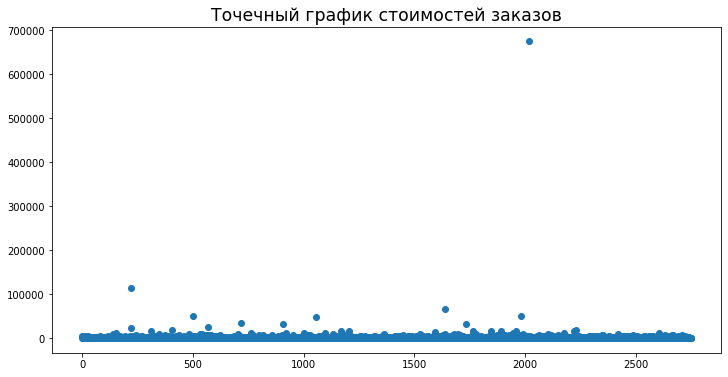

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
x_values = pd.Series(range(0,len(orders_summa['summa'])))
plt.scatter(x_values, orders_summa['summa'])
plt.title('Точечный график стоимостей заказов',fontsize='xx-large')

In [36]:
np.percentile(orders_summa['summa'], [90, 95, 99])

array([ 3224.  ,  4830.65, 11247.06])

Text(0.5, 1.0, 'Точечный график стоимостей заказов')

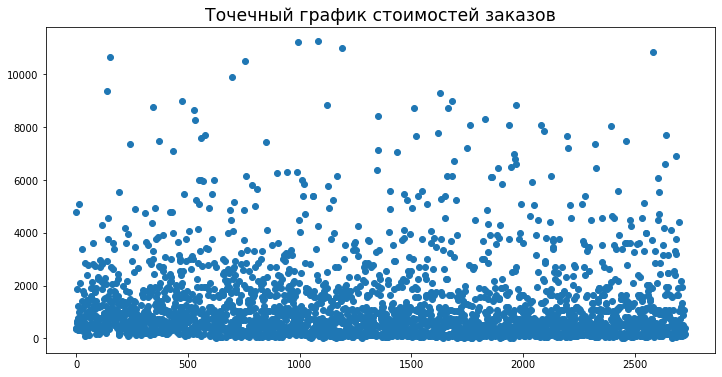

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
x_values = pd.Series(range(0,len(orders_summa[orders_summa['summa']<=11275.5])))
plt.scatter(x_values, orders_summa[orders_summa['summa']<=11275.5]['summa'])
plt.title('Точечный график стоимостей заказов',fontsize='xx-large')

Стало лучше, теперь отчетливо видно, что основная часть заказов варьируется до 2000 у.е.

In [38]:
orders_summa[orders_summa['summa']<=11275.5]['summa'].describe()

count    2723.000000 
mean     1237.910393 
std      1519.677735 
min      14.000000   
25%      300.000000  
50%      727.000000  
75%      1574.000000 
max      11250.000000
Name: summa, dtype: float64

Средний чек за период составил 1239.61, медианное значение 727 рублей.

<a name="3.2"></a><br/>
<font size="4"><b>3.2 Первый сегмент покупателей vip-клиенты</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Уберем выбросы и сделаем метрику средний чек за день, за месяц. Построим линейные графики.

In [39]:
# посмотрим какова доля выбросов от общей выручки
print('{:.2%} доля выбросов от общей выручки'.format(
    orders_summa[orders_summa['summa']>=11275.5]['summa'].sum()/orders_summa['summa'].sum()))

29.13% доля выбросов от общей выручки


Аномальные заказы дали нам 29% от суммарной выручки за год. Необходимо найти этих клиентов,и попросить еще раз купить. Стоит таких клиентов записать в касту vip_clients, затем отдельно анализировать и сделать специальные предложения для них.

In [40]:
vip_orders=orders_summa[orders_summa['summa']>=11275.5]['order_id'].tolist()
vip_clients=df.query('order_id==@vip_orders')['customer_id'].unique()
print('Количество VIP клиентов', len(vip_clients), '\n'*2, 'Посмотрим на них внимательно, возможно это наш сосед по даче','\n', vip_clients)

Количество VIP клиентов 25 

 Посмотрим на них внимательно, возможно это наш сосед по даче 
 ['b731df05-98fa-4610-8496-716ec530a02c'
 'cd09ea73-d9ce-48c3-b4c5-018113735e80'
 '9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f'
 '1b2764ad-9151-4051-a46a-9b01b62e6335'
 '8fba3604-ef57-4b9f-b2fe-3402fa8825c8'
 '6987e6d6-a63a-4ce2-a2d0-f424092d235e'
 'eb04c06f-bee9-45bd-9392-4addbc54952f'
 '58a4c3cc-504f-43ea-a74a-bae19e665552'
 '909564b8-3a5c-4d3e-8310-5ba1c837bbd7'
 'c971fb21-d54c-4134-938f-16b62ee86d3b'
 '5bee7748-a089-4d7c-a1ad-075cd8846a41'
 '57cc80a2-2610-4eef-9457-e7c3bf0c72f0'
 'ae6940d3-a1c7-4997-8853-a5b8afc60d51'
 '498f12a4-6a62-4725-8516-cf5dc9ab8a3a'
 'ff31d802-dae6-484d-a3dc-c9723f1cb538'
 '5d189e88-d4d6-4eac-ab43-fa65a3c4d106'
 '1d6c8c1f-a799-4418-9af2-1ded47d7a85c'
 'db77c238-3c80-4032-9e3c-c30a43f4a650'
 '940c175f-ea87-44e0-9e16-0a3d0a9abecd'
 '09bcc3d0-8134-4f00-8ea5-b74b55d766ad'
 '146cd9bf-a95c-4afb-915b-5f6684b17444'
 '312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6'
 '55f5138e-78d9-4a55-9237-4

In [41]:
# введем столбец type_of_client в наш исходник.
df['type_of_client']=''
# выделим vip клиентов отметкой vip
index_vip=df.query('customer_id in @vip_clients').index.tolist()
df.loc[index_vip,'type_of_client']='vip'
# проверка 
df.query('customer_id in @vip_clients')['type_of_client'].unique()

array(['vip'], dtype=object)

Жаль, но ни одного знакомого лица.
Т.е. мы уже сформировали как минимум два типа клиентов.  VIP клиент, который тратит много денег в нашем магазине, и обычный клиент. Вот обычных клиентов мы еще поделим по типам, а пока проанализируем два этих портрета покупателей по основным для нас метрикам это средний чек, количество заказов и суммарная выручка.
Посмотри сначала на эти метрики для VIP клиентов.

In [42]:
metrick_for_vip=df.query('customer_id in @vip_clients').groupby('dt').agg({'summa':'sum','quantity':'sum','order_id':'nunique',}).reset_index()
metrick_for_vip['AVG_check']=(metrick_for_vip['summa']/metrick_for_vip['order_id']).round(2)
metrick_for_vip['month']=metrick_for_vip['dt'].astype('datetime64[M]')
metrick_for_vip.tail()

,dt,summa,quantity,order_id,AVG_check,month
83,2019-06-22,114750,900,1,114750.0,2019-06-01
84,2019-07-29,14917,1,1,14917.0,2019-07-01
85,2019-07-31,12150,90,1,12150.0,2019-07-01
86,2019-08-01,17620,10,1,17620.0,2019-08-01
87,2019-10-28,65220,60,1,65220.0,2019-10-01


In [43]:
AVG_check_mounth_for_vip=metrick_for_vip.groupby('month').agg({'summa':'sum','quantity':'sum','order_id':'sum'}).reset_index()
AVG_check_mounth_for_vip['AVG_check_mounth']=(AVG_check_mounth_for_vip['summa']/AVG_check_mounth_for_vip['order_id']).round(2)
AVG_check_mounth_for_vip['month']=AVG_check_mounth_for_vip['month'].astype(str)
AVG_check_mounth_for_vip

,month,summa,quantity,order_id,AVG_check_mounth
0,2018-10-01,112604,824,24,4691.83
1,2018-11-01,83031,165,22,3774.14
2,2018-12-01,76711,118,44,1743.43
3,2019-01-01,74070,45,9,8230.00
4,2019-02-01,68822,80,29,2373.17
5,2019-03-01,23077,22,9,2564.11
6,2019-04-01,50897,88,5,10179.40
7,2019-05-01,30295,305,2,15147.50
8,2019-06-01,932103,2497,8,116512.88
9,2019-07-01,27067,91,2,13533.50


In [156]:
def make_graf(table1,col,col2,title):
    fig, ax = plt.subplots(figsize=(15,6))
    plt.plot(table1[col2], table1[col], 'o-')
    plt.text(table1.loc[table1[table1[col]==table1[col].max()].index[0],col2], table1[col].max(),
             int(table1[col].max()), horizontalalignment='center',rotation=0,verticalalignment='bottom',
             fontdict={'fontweight':500, 'size':12})
    ax.set_xticklabels(table1[col2],rotation=45,size=14)
    plt.grid(True)
    plt.title(title,fontsize='xx-large')

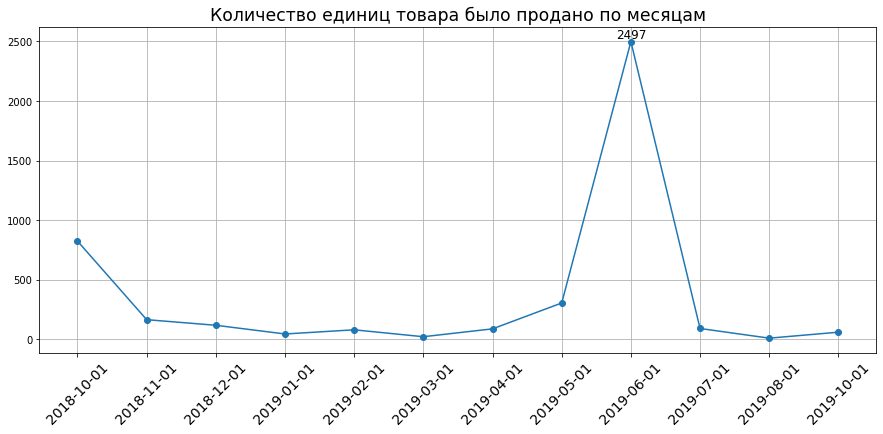

In [157]:
make_graf(AVG_check_mounth_for_vip,'quantity','month','Количество единиц товара было продано по месяцам')

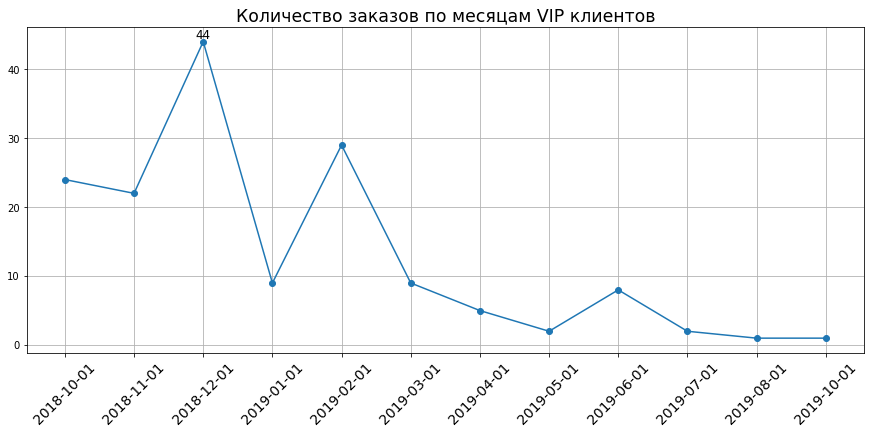

In [159]:
make_graf(AVG_check_mounth_for_vip,'order_id','month','Количество заказов по месяцам VIP клиентов')

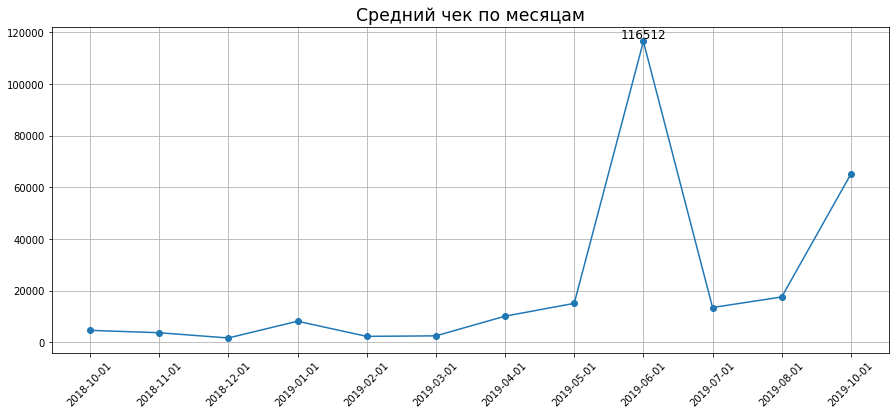

In [47]:
make_graf(AVG_check_mounth_for_vip,'AVG_check_mounth','month','Средний чек по месяцам')

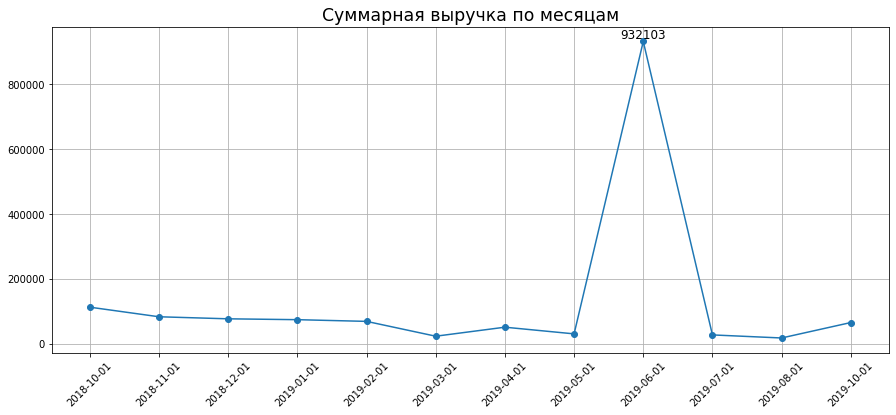

In [48]:
make_graf(AVG_check_mounth_for_vip,'summa','month','Суммарная выручка по месяцам')

Так,в июле у нас взрывная выручка и небывалое количество проданных товаров. Надо найти провокатора-оптовика.

In [49]:
df.query('customer_id in @vip_clients and month=="6"').groupby(['customer_id','order_id','product']).agg({'quantity':'sum','summa':'sum'})

quantity  \
customer_id                          order_id product                                                                                         
09bcc3d0-8134-4f00-8ea5-b74b55d766ad 71633    стремянка scab balzo 762 5 ступеней алюминиевая 3885                                 3          
146cd9bf-a95c-4afb-915b-5f6684b17444 71668    вешалки мягкие для деликатных вещей 3 шт шоколад                                     334        
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада кабачка сорт аэронавт, кассета по 6шт                                        75         
                                              рассада кабачка сорт белогор кассета 6 шт e6                                         75         
                                              рассада кабачка сорт горный, кассета по 6шт                                          75         
                                              рассада кабачка сорт зебра кассета 6 шт e6                                           75         
                                              рассада кабачка сорт золотинка кассета 6 шт e6                                       75         
                                              рассада кабачка сорт сосновский, кассета по 6шт                                      75         
                                              рассада огурец кристина ячейки по 6 шт е6                                            75         
                                              рассада огурец фараон ячейки по 6 шт е6                                              75         
                                              рассада огурца сорт каролина кассета 6 шт e6                                         75         
                                              рассада патиссона сорт диск, кассета по 6шт                                          75         
                                              рассада патиссона сорт нло белый, кассета по 6шт                                     75         
                                              тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт                 75         
312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6 71743    вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000                    1000       
940c175f-ea87-44e0-9e16-0a3d0a9abecd 71598    скатерть круглая d-175 см 50% полиэстер 50% хлопок белая wellness mld-187-эстель*01  10         
                                     71685    скатерть 180 см wellness wtd180-лион*01 100% полиэстер                               8          
ae6940d3-a1c7-4997-8853-a5b8afc60d51 71148    гладильная доска ника гранд 122х42 см нг                                             18         
db77c238-3c80-4032-9e3c-c30a43f4a650 14835    бакопа ампельная махровая белая махровая объем 0,5 л                                 7          
                                              бакопа ампельная махровая сиреневая махровая объем 0,5 л                             7          
                                              бакопа ампельная махровая фиолетовая махровая объем 0,5 л                            7          
                                              бакопа ампельная мега-крупная белая объем 0,5 л                                      7          
                                              бакопа ампельная мега-крупная розовая объем 0,5 л                                    7          
                                              бакопа ампельная мега-крупная синяя объем 0,5 л                                      7          
                                              бакопа ампельная мега-крупная сиреневая объем 0,5 л                                  7          
                                              бакопа ампельная, диам. 12 см                                                        7          
                                              барвинок синий объем 0,5 л                                                       

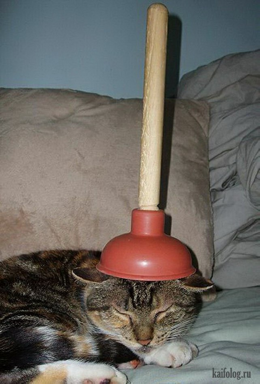 
#### наш главный Vip клиент-оптовик  "312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6" 1000 красных вантузов за раз! 

<a name="3.3"></a><br/>
<font size="4"><b>3.3 Второй сегмент покупателей mass-клиенты</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [50]:
metrick=df.query('customer_id not in @vip_clients').groupby('dt').agg({'summa':'sum','quantity':'sum','order_id':'nunique',}).reset_index()
metrick['AVG_check']=(metrick['summa']/metrick['order_id']).round(2)
metrick['month']=metrick['dt'].astype('datetime64[M]')
metrick.tail()

,dt,summa,quantity,order_id,AVG_check,month
387,2019-10-27,550,6,2,275.00,2019-10-01
388,2019-10-28,7346,112,7,1049.43,2019-10-01
389,2019-10-29,642,3,3,214.00,2019-10-01
390,2019-10-30,6325,16,10,632.50,2019-10-01
391,2019-10-31,5851,11,8,731.38,2019-10-01


In [51]:
AVG_check_mounth=metrick.groupby('month').agg({'summa':'sum','quantity':'sum','order_id':'sum'}).reset_index()
AVG_check_mounth['AVG_check_mounth']=(AVG_check_mounth['summa']/AVG_check_mounth['order_id']).round(2)
AVG_check_mounth['month']=AVG_check_mounth['month'].astype(str)
AVG_check_mounth

,month,summa,quantity,order_id,AVG_check_mounth
0,2018-10-01,305202,1220,212,1439.63
1,2018-11-01,289941,1192,182,1593.08
2,2018-12-01,292273,952,230,1270.75
3,2019-01-01,199048,693,156,1275.95
4,2019-02-01,275842,961,256,1077.51
5,2019-03-01,275320,1223,233,1181.63
6,2019-04-01,307549,1497,259,1187.45
7,2019-05-01,236621,1330,174,1359.89
8,2019-06-01,168143,612,151,1113.53
9,2019-07-01,233061,667,195,1195.18


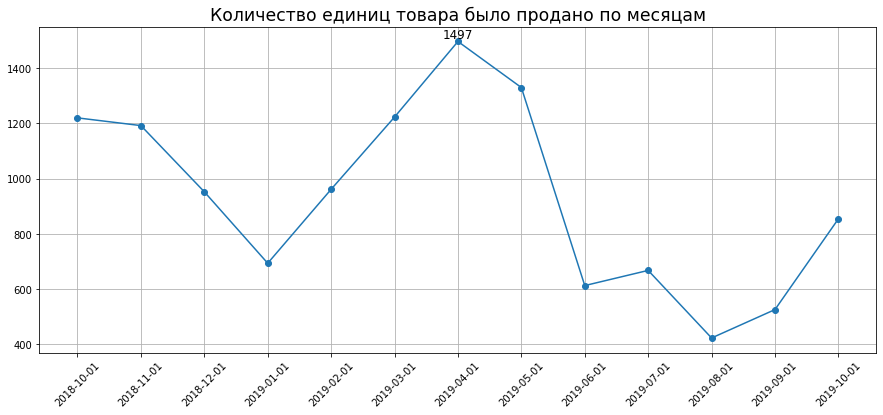

In [52]:
make_graf(AVG_check_mounth,'quantity','month','Количество единиц товара было продано по месяцам')

Вангую, что рассада.

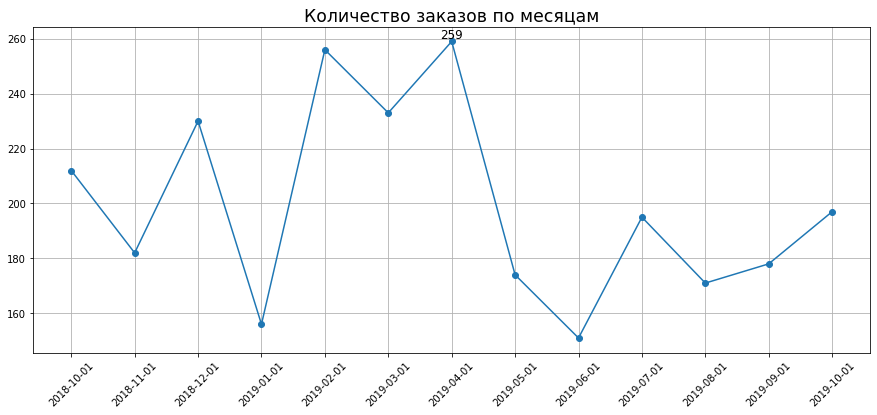

In [53]:
make_graf(AVG_check_mounth,'order_id','month','Количество заказов по месяцам')

Больше всего заказов у нас было в апреле. Ну точно, должна быть рассада.

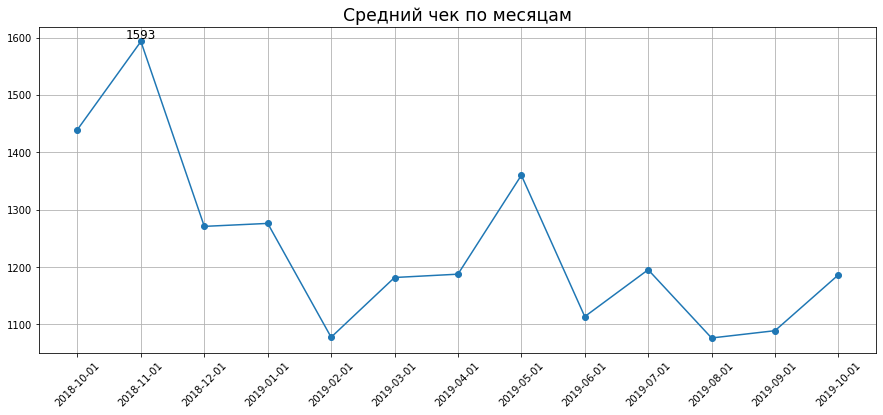

In [54]:
make_graf(AVG_check_mounth,'AVG_check_mounth','month','Средний чек по месяцам')

Самый высокий средний чек был в январе. Самый низкий в мае и апреле. Посмотрим, что было с выручкой.

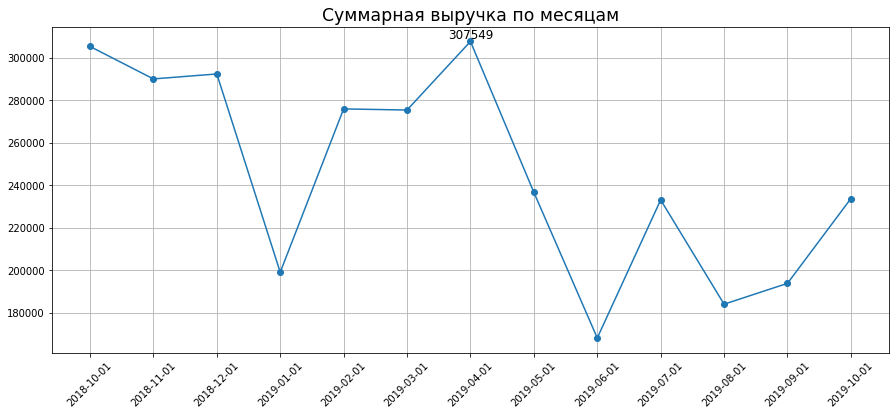

In [55]:
make_graf(AVG_check_mounth,'summa','month','Суммарная выручка по месяцам')

<a name="3.4"></a><br/>
<font size="4"><b>3.4 Посмотрим на зависимость покупок от дня недели и времени суток</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [56]:
# средний чек по дням недели
metrick2=df.query('customer_id not in @vip_clients').groupby('weekday').agg({'summa':'sum','quantity':'sum','order_id':'nunique',}).reset_index()
metrick2['AVG_check']=(metrick2['summa']/metrick2['order_id']).round(2)
weekday=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for i in range(len(metrick2)):
    metrick2.loc[i,'weekday']=weekday[i]
metrick2

,weekday,summa,quantity,order_id,AVG_check
0,Monday,541608,2667,441,1228.14
1,Tuesday,554928,2011,457,1214.28
2,Wednesday,497688,1722,391,1272.86
3,Thursday,537011,2030,404,1329.24
4,Friday,423148,1580,328,1290.09
5,Saturday,271718,838,241,1127.46
6,Sunday,368461,1300,332,1109.82


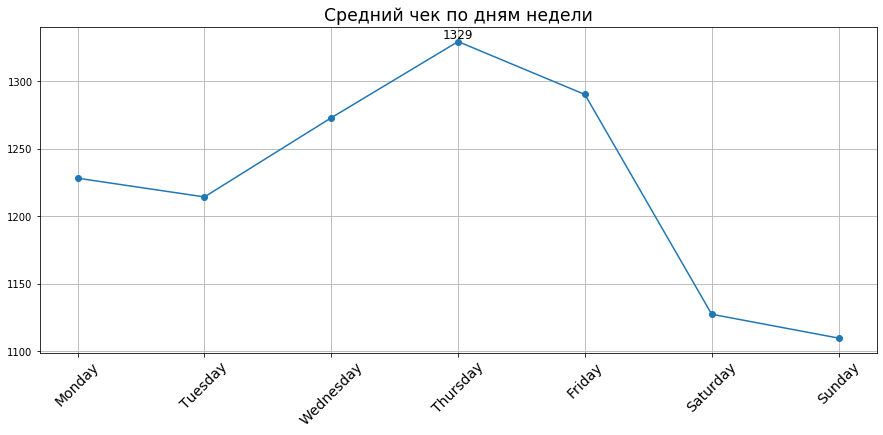

In [160]:
make_graf(metrick2,'AVG_check','weekday','Средний чек по дням недели')

In [58]:
# средний чек по времени суток
metrick3=df.query('customer_id not in @vip_clients').groupby('hour').agg({'summa':'sum','quantity':'sum','order_id':'nunique',}).reset_index()
metrick3['AVG_check']=(metrick3['summa']/metrick3['order_id']).round(2)
metrick3['hour']=metrick3['hour'].astype(str)
metrick3

,hour,summa,quantity,order_id,AVG_check
0,0,36512,67,32,1141.00
1,1,31612,59,15,2107.47
2,2,20837,19,12,1736.42
3,3,6610,9,8,826.25
4,4,19036,93,17,1119.76
5,5,22846,74,19,1202.42
6,6,45900,87,30,1530.00
7,7,95961,197,58,1654.50
8,8,149284,684,118,1265.12
9,9,223703,882,164,1364.04


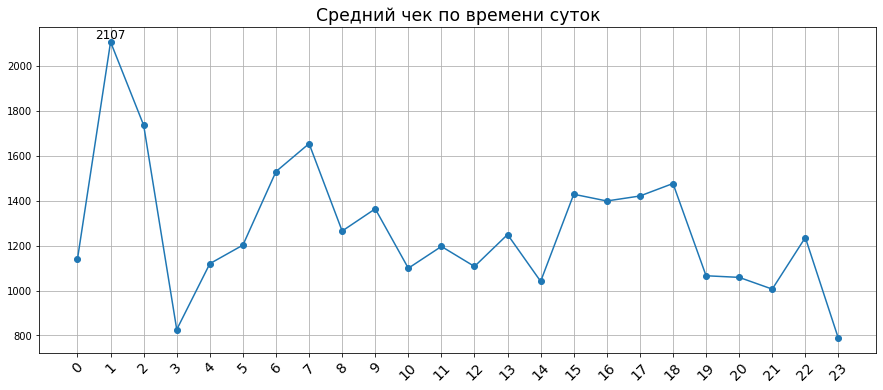

In [161]:
make_graf(metrick3,'AVG_check','hour','Средний чек по времени суток')

<a name="3.5"></a><br/>
<font size="4"><b>3.5 Прибыльный и не очень ассортимент. Категоризация товаров.</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Пройдемся по ассортименту.

In [60]:
df_clean=df.query('customer_id not in @vip_clients')
print('В магазине имеем {} наименований товара по которым совершались покупки'.format(len(df['product'].unique())))
print('В магазине покупалось {} наименований товара исключая вип заказы'.format(len(df_clean['product'].unique())))

В магазине имеем 2328 наименований товара по которым совершались покупки
В магазине покупалось 2220 наименований товара исключая вип заказы


О чем это говорит? О том, что обычный покупатель не рассматривает в покупки товары, которые покупают Vip клиенты, напомню  они принесли нам 29% прибыли. 
Т.е. может быть нам стоит привлекать таких клиентов похожих из списка Vip_clients и продавать им небольшой ассортимент, который их интересует всего 108 наименований, и у нас будет супер-успешный магазин? А может нам нужно открыть несколько таких магазинов? Попробуем ответить на эти вопросы.

Но пока узнаем, что лучше всего покупается обычными клиентами и Vip клиентами. Для это нам нобходимо сгруппировать товары по категориям.
Сделаем лемманитизацию.

In [61]:
m = Mystem()
df['product_lem']=''
#создадим столбец с лемманитизированным значением столбца purpose
for i in range(len(df)):
    df['product_lem'][i]=m.lemmatize(df['product'][i])
df['product_lem'].value_counts().reset_index().head(40)

/home/catfox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index,product_lem
0,"[рассада, , кабачок, , сорт, , зебра, , кассета, , 6, , шт, , e6, \n]",79
1,"[рассада, , кабачок, , сорт, , золотинка, , кассета, , 6, , шт, , e6, \n]",78
2,"[рассада, , кабачок, , сорт, , белогор, , кассета, , 6, , шт, , e6, \n]",77
3,"[рассада, , кабачок, , сорт, , горный, , , кассета, , по, , 6шт, \n]",76
4,"[тагетис, , крупноцветковый, , рассада, , однолетний, , цветок, , в, , кассета, , по, , 10, , шт, \n]",76
5,"[рассада, , кабачок, , сорт, , аэронавт, , , кассета, , по, , 6шт, \n]",76
6,"[рассада, , огурец, , фараон, , ячейка, , по, , 6, , шт, , е6, \n]",76
7,"[рассада, , огурец, , сорт, , каролина, , кассета, , 6, , шт, , e6, \n]",76
8,"[рассада, , кабачок, , сорт, , сосновский, , , кассета, , по, , 6шт, \n]",75
9,"[рассада, , патиссон, , сорт, , нло, , белый, , , кассета, , по, , 6шт, \n]",75


In [62]:
df['product_lem'].value_counts().reset_index().head(40)

,index,product_lem
0,"[рассада, , кабачок, , сорт, , зебра, , кассета, , 6, , шт, , e6, \n]",79
1,"[рассада, , кабачок, , сорт, , золотинка, , кассета, , 6, , шт, , e6, \n]",78
2,"[рассада, , кабачок, , сорт, , белогор, , кассета, , 6, , шт, , e6, \n]",77
3,"[рассада, , кабачок, , сорт, , горный, , , кассета, , по, , 6шт, \n]",76
4,"[тагетис, , крупноцветковый, , рассада, , однолетний, , цветок, , в, , кассета, , по, , 10, , шт, \n]",76
5,"[рассада, , кабачок, , сорт, , аэронавт, , , кассета, , по, , 6шт, \n]",76
6,"[рассада, , огурец, , фараон, , ячейка, , по, , 6, , шт, , е6, \n]",76
7,"[рассада, , огурец, , сорт, , каролина, , кассета, , 6, , шт, , e6, \n]",76
8,"[рассада, , кабачок, , сорт, , сосновский, , , кассета, , по, , 6шт, \n]",75
9,"[рассада, , патиссон, , сорт, , нло, , белый, , , кассета, , по, , 6шт, \n]",75


Режет глаз рассада с черенками, цветы, сумки. 
Как сгруппировать это оптимально? Предлагаю частями и попробуем сминимизировать ручную(глазами работу).
Какой из нас  аналитик, если мы все делаем руками?! Предлагаю спарсить какой-нибудь сайт, где есть растения в алфавитном порядке, сейчас загуглю и вернусь с ссылкой.

Так, зачем далеко ходить, когда под рукой у нас есть википедия.
Нашел на вики алфавитный указатель по растениям, пример ссылки ниже:
https://ru.wikipedia.org/w/index.php?title=Категория:Растения_по_алфавиту&from=А

In [63]:
start = time.time()
alphabet=['А']
list_of_plant=[]
# будем парсить ВИКИ
for letter in alphabet:
    if letter=="ячмень обыкновенный":
        break
    # создадим URL как https://ru.wikipedia.org/w/index.php?title=Категория:Растения_по_алфавиту&from= + буква
    URL='https://ru.wikipedia.org/w/index.php?title=Категория:Растения_по_алфавиту&from='+letter
    # GET-запрос
    req = requests.get(URL) 
    # варим суп из Википедии
    soup = BeautifulSoup(req.text, 'lxml')
    #print(soup)
    for row in soup.find_all('li'):
        if letter=="рапс" and str.lower(row.text)=="растения":
            list_of_plant.append(str.lower(row.text))
            #alphabet.append(list_of_plant[-1])
            continue
        elif str.lower(row.text)=="растения":
            alphabet.append(list_of_plant[-1])
            break    
        elif str.lower(row.text)=="розовые" and "розовые" not in alphabet:
            list_of_plant.append(str.lower(row.text))
            alphabet.append(str.lower(row.text))
            break
        elif str.lower(row.text)=="ячмень обыкновенный":
            alphabet.append(str.lower(row.text))
            break
        else:
            list_of_plant.append(str.lower(row.text))
end = time.time()
print('Мы спарсили {} наименований растений всего за {} минут'.format(len(list_of_plant),(end-start)/60))

Мы спарсили 9339 наименований растений всего за 0.5344265421231588 минут


Методом проб и ошибок было выяснено, что просто пройтись по алфавиту не достаточно, т.к. для каждой буквы открывается 200 растений, поэтому пришлось потрудиться и  ходить по вкладкам. 

In [64]:
# Проверим
'хризолидокарпус' in list_of_plant

False

Результат шокирует, мы спарсили вики, а он не находит какой-то обычный 'хризолидокарпус'. Очень вот обидно.
Продолжаем парсить.

In [65]:
list_of_plant_2=[]
# будем парсить какую-то 
URL='http://www.obradoval.ru/encyclopedia-cvetov/'
# GET-запрос
req = requests.get(URL) 
# варим суп из Википедии
soup = BeautifulSoup(req.text, 'lxml')
for row in soup.find_all('a'):    
    if str(row.text)=='Оформить заказ':
        break
    list_of_plant_2.append(str.lower(row.text))

# немного магии
list_of_plant2=list_of_plant_2[176:]
print('В новом списке растений {} наименования'.format(len(list_of_plant2)))

В новом списке растений 193 наименования


In [66]:
# Проверим
'хризолидокарпус' in list_of_plant2

True

Ну наконец-то нашелся.

У нас всписке из ВИКИ много двойных названий, пример, Роза Бэнкс, а вот обычной розы - нет.
Поэтому пройдемся по списку иоставим первые наименования цветов без классификатора, запишем в новый списокl ist_of_plant3

In [67]:
list_of_plant3=[]
for name in list_of_plant:
    if " " in name:
        list_of_plant3.append(name.split(" ")[0])
#объединим три списка
list_of_plant_all=list_of_plant+list_of_plant2+list_of_plant3

#  теперь оставим один неповторяющийся контейнер
set_of_plant_all=set(list_of_plant_all)

print('Длина контейнера с наименованиями цветов', len(set_of_plant_all))

Длина контейнера с наименованиями цветов 10027


In [68]:
# создадим столбец 'category'
df['category']=''
for i in range(len(df)):
    lem_list=df.loc[i,'product_lem']
    for nam in lem_list:
        if len(name)<3:
            continue
        elif nam in list_of_plant_all or nam=='растение':
            df.loc[i,'category']='растения'
            break      
df.groupby('category').agg({'product':'nunique'})

,product
category,
,1251
растения,1077


Растения в нашем магазине занимают серьезную нишу. Посмотрим, что еще есть.

In [69]:
df.query('category==""')['product_lem'].value_counts().reset_index().head(10)

,index,product_lem
0,"[тагетис, , крупноцветковый, , рассада, , однолетний, , цветок, , в, , кассета, , по, , 10, , шт, \n]",76
1,"[сумка, -, тележка, , 2, -, х, , колесный, , gimi, , argo, , красный, \n]",70
2,"[сумка, -, тележка, , 2, -, х, , колесный, , gimi, , argo, , синий, \n]",61
3,"[сушилка, , для, , белье, , настенный, , zalger, , prima, , 510, -, 720, , веревочный, , 7, , линия, , 25, , м, \n]",18
4,"[гладильный, , доска, , ника, , гранд, , 122х42, , см, , нга, \n]",16
5,"[циперус, , зумул, , d, -, 12, , см, , h, -, 25, , см, \n]",15
6,"[бакоп, , ампельный, , махровый, , сиреневый, , махровый, , объем, , 0, ,, 5, , л, \n]",15
7,"[бакоп, , ампельный, , махровый, , фиолетовый, , махровый, , объем, , 0, ,, 5, , л, \n]",14
8,"[таз, , пластмассовый, , со, , стиральный, , доска, (, иж, ), , 1404021, \n]",14
9,"[бакоп, , ампельный, , мега, -, крупный, , розовый, , объем, , 0, ,, 5, , л, \n]",13


* Рассада! она ведь тоже растение скажете вы, да, но нет=) Это отдельная категория имеющая свою сезонность.
* Сумки - тележки. Каждая продвинутая бабуля знает наш магазин.

In [70]:
# словарь для категорий
category_dict1={'сумка':'багаж','тележка':'багаж','рассада':'рассада'}
#
def category(key,value):
    for i in range(len(df)):
        lem_list=df.loc[i,'product_lem']
        for nam in lem_list:
            if len(nam)<3:
                continue
            if nam==key:
                df.loc[i,'category']=value
                break
for unit in category_dict1.keys():
    category(unit,category_dict1[unit])
                
df.groupby('category').agg({'product':'nunique'})

,product
category,
,1134
багаж,109
рассада,221
растения,864


In [71]:
df.query('category==""')['product_lem'].value_counts().reset_index().head(40)

,index,product_lem
0,"[сушилка, , для, , белье, , настенный, , zalger, , prima, , 510, -, 720, , веревочный, , 7, , линия, , 25, , м, \n]",18
1,"[гладильный, , доска, , ника, , гранд, , 122х42, , см, , нга, \n]",16
2,"[циперус, , зумул, , d, -, 12, , см, , h, -, 25, , см, \n]",15
3,"[бакоп, , ампельный, , махровый, , сиреневый, , махровый, , объем, , 0, ,, 5, , л, \n]",15
4,"[бакоп, , ампельный, , махровый, , фиолетовый, , махровый, , объем, , 0, ,, 5, , л, \n]",14
5,"[таз, , пластмассовый, , со, , стиральный, , доска, (, иж, ), , 1404021, \n]",14
6,"[бакоп, , ампельный, , мега, -, крупный, , розовый, , объем, , 0, ,, 5, , л, \n]",13
7,"[бакоп, , ампельный, , мега, -, крупный, , белый, , объем, , 0, ,, 5, , л, \n]",13
8,"[сушилка, , для, , белье, , потолочный, , лиана, , 2, ,, 0, , м, , 1703009, \n]",12
9,"[бакоп, , ампельный, , мега, -, крупный, , синий, , объем, , 0, ,, 5, , л, \n]",11


Меня смущает четыре вещи:
* 1.Снова вижу цветок в топе - циперус, и декабрист внизу, опять камень в любимую ВИКИ.
* 2.Бакоп,что это? Минутку, да это же снова цветок! Вывод, ни ВИКИ единой черпать инфу.
* 3.Овощные и фруктовые муляжи, к чему бы они? Возможно они могут испортить нашу категорию растений.
* 4.Сколько все-таки у нас сушилок и досок, и естьли вешалки.

Это последняя итеррация, т.к. у нас нет задачи полностью категоризовать ассортимент, а основная задача нарисовать портреты покупателей. Хотя эти задачи взаимосвязаны.

Еще раз запустим функцию.

In [72]:
category_dict2={'муляж':'декор', 'гвоздик':'декор', 'циперус':'растения','бакоп':'растения', 'декабрист':'растения',
                'сушилка':'для белья','доска':'для белья','вешалка':'для белья'}
for unit in category_dict2.keys():
    category(unit,category_dict2[unit])
                
df.groupby('category').agg({'product':'nunique'})

,product
category,
,850
багаж,108
декор,77
для белья,288
рассада,220
растения,785


Растений стало 666 это точно знак остановиться.
Но еще раз взглянем на ассортимент.

In [73]:
lem=df.query('category==""')['product_lem'].value_counts().reset_index()
lem.head(50)

,index,product_lem
0,"[корыто, , оцинковывать, , 45, , л, , бесшовный, , , 1303007, \n]",10
1,"[штора, , для, , ванный, , комната, , 240х200, , verga, , белый, , текстильный, , 240х200, , см, , 6040, \n]",10
2,"[ерш, , унитазный, , с, , деревянный, , ручка, , , ваир, , 1712012, \n]",9
3,"[стремянка, , colombo, , leonardo, , 2, , ступень, , g300a02w, , серый, , 3646, \n]",8
4,"[подкладка, , под, , чехол, , zalger, , 520114, , 135х50, , см, , войлок, \n]",8
5,"[коврик, , хлопковый, , 50х80, , см, , цвет, , в, , ассортимент, , 6196, \n]",8
6,"[подрукавник, , складной, , ника, , п, \n]",7
7,"[сидение, , в, , ванна, , раздвижной, , , белый, , , св5, , , ника, \n]",7
8,"[стремянка, , бытовой, , framar, , slimmy, , 4, , ступень, \n]",7
9,"[карниз, , для, , ванный, , комната, , виолета, , раздвижной, , 280, , см, , с, , кольцо, , бежевый, , 2810, /, 2, \n]",7


Вижу, что тут еще есть как минимум две категории, это для ванной и посуда. Но меня каждый разрасстраивает, что делаю это глазами, а не автоматизировано.

Последняя итерация товары для списка вип клиентов.

In [74]:
df.head(1)

,date,customer_id,order_id,product,quantity,price,summa,dt,weekday,hour,month,year,week,type_of_client,product_lem,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,142,2018-10-01,0,0,10,2018,40,,"[комнатный, , растение, , в, , горшок, , алый, , вера, , , d12, , , h30, \n]",растения


In [75]:
vip_goods=[]
all_goods=df['product'].unique().tolist()
mass_goods=set(df_clean['product'].unique().tolist())
for name in all_goods:
    if name not in mass_goods:
        vip_goods.append(name)
    

len(vip_goods)

108

In [76]:
index_vip=df.query('product in @vip_goods').index.tolist()
for index in index_vip:
    df.loc[index, 'category']='товары для VIP клиентов'
index_other=df.query('category==""').index.tolist()
for index in index_other:
    df.loc[index,'category']='бытовые и хозтовары'
df.groupby('category').agg({'product':'nunique'})

,product
category,
багаж,104
бытовые и хозтовары,790
декор,77
для белья,271
рассада,217
растения,761
товары для VIP клиентов,108


Закончили категоризовать товар. Посмотрим самую прибыльную категорию.

In [77]:
category_revenue=df.groupby('category').agg({'summa':'sum'}).sort_values('summa',ascending=False).reset_index()
category_revenue

,category,summa
0,бытовые и хозтовары,1152097
1,товары для VIP клиентов,1145777
2,багаж,816968
3,для белья,738888
4,растения,606572
5,рассада,208707
6,декор,87070


In [144]:
def make_graf(title,col1,col2,ylabel):
    plt.figure(figsize=(15,7), dpi= 80)
    plt.bar(col1, col2) 
    for i, val in enumerate(col2.values):
        plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':14})
    plt.title(title,size=16)
    plt.gca().set_xticklabels(col1, rotation=60,size=14)
    plt.xlabel('Источник',size=16)
    plt.ylabel(ylabel,size=16)


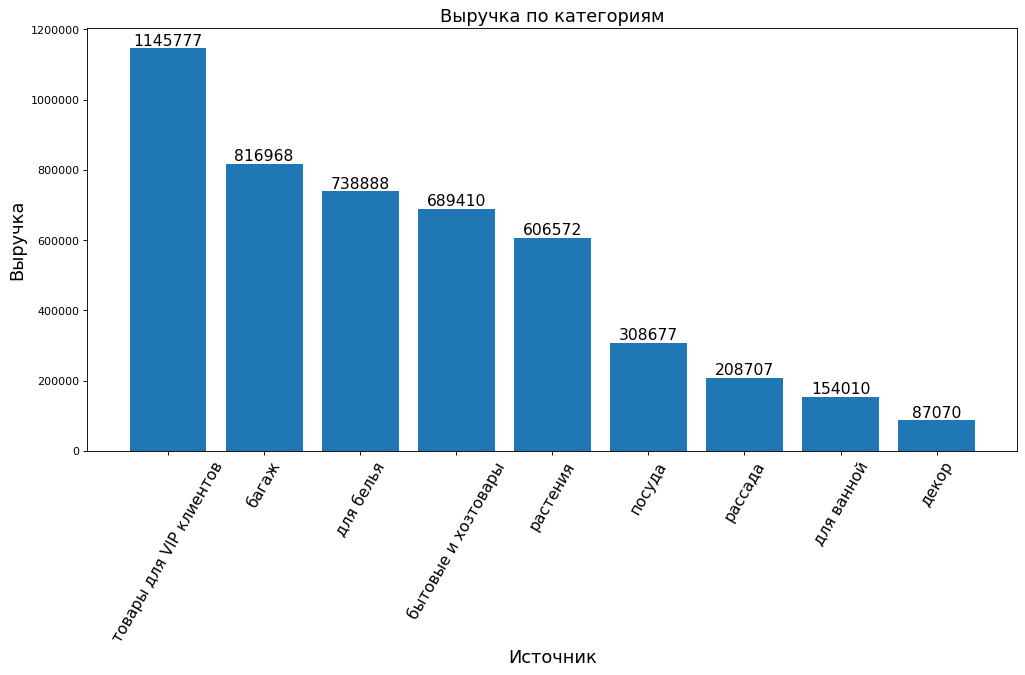

In [145]:
make_graf('Выручка по категориям',category_revenue['category'],category_revenue['summa'],'Выручка')

Самая большая выручка от категории бытовые и хозтовары.
О чем это говорит, нужно все же делить её. 

Вы наверно сейчас думаете почему бы не найти готовый каталог, и сделать простую подстановку по категориям,
отвечаю - это не наши методы. Мы учимся и отрабатываем навыки, ведь это последний проект.
В работе буду использовать оптимальный по скорости путь! Кстати, Вам не нужен способный джун?=)

Ёжики плакали и кололись, но продолжали парсить ВИКИ.

In [80]:
list_of_dishes=[]
# создадим URL
URL='https://ru.wikipedia.org/wiki/Категория:Посуда'
# GET-запрос
req = requests.get(URL) 
# варим суп из Википедии
soup = BeautifulSoup(req.text, 'lxml')
#print(soup)

for row in soup.find_all('li'):
    if str.lower(row.text)=='le creuset':
        break
    list_of_dishes.append(str.lower(row.text))

# немного магии
list_of_dishes=list_of_dishes[(list_of_dishes.index('абура кири')):]
        
print('Мы спарсили {} наименований посуды'.format(len(list_of_dishes)))


Мы спарсили 113 наименований посуды


In [81]:
list_of_dishes1=[]
for name in list_of_dishes:
    if " " in name:
        list_of_dishes1.append(name.split(" ")[0])
#объединим два списка
list_of_dishes_all=list_of_dishes+list_of_dishes1+['нож']

#  теперь оставим один неповторяющийся контейнер
list_of_dishes_all=set(list_of_dishes_all)

print('Длина контейнера с наименованиями посуды', len(list_of_dishes_all))

Длина контейнера с наименованиями посуды 147


In [82]:
# переделаем немного функцию
def category1(key_list,value,group_for_split):
    group=group_for_split
    index_list=df.query('category==@group').index.tolist()
    for indx in index_list:
        
        lem_list=df.loc[indx,'product_lem']
        for nam in lem_list:
            if len(nam)<3:
                continue
            if nam in key_list:
                df.loc[indx,'category']=value
                break
category1(list_of_dishes_all,'посуда','бытовые и хозтовары')                
df.groupby('category').agg({'product':'nunique'})

,product
category,
багаж,104
бытовые и хозтовары,531
декор,77
для белья,271
посуда,259
рассада,217
растения,761
товары для VIP клиентов,108


In [83]:
list_of_bathroom=['ванный','ванна']
category1(list_of_bathroom,'для ванной','бытовые и хозтовары')                
df.groupby('category').agg({'product':'nunique'})

,product
category,
багаж,104
бытовые и хозтовары,461
декор,77
для белья,271
для ванной,70
посуда,259
рассада,217
растения,761
товары для VIP клиентов,108


In [84]:
category_revenue=df.groupby('category').agg({'summa':'sum'}).sort_values('summa',ascending=False).reset_index()
category_revenue

,category,summa
0,товары для VIP клиентов,1145777
1,багаж,816968
2,для белья,738888
3,бытовые и хозтовары,689410
4,растения,606572
5,посуда,308677
6,рассада,208707
7,для ванной,154010
8,декор,87070


In [152]:
category_revenue.query('category=="для белья"').summa/category_revenue.summa.sum()

2    0.155357
Name: summa, dtype: float64

In [154]:
category_revenue.query('category=="товары для VIP клиентов"').summa

0    1145777
Name: summa, dtype: int64

In [153]:
category_revenue.summa.sum()

4756079

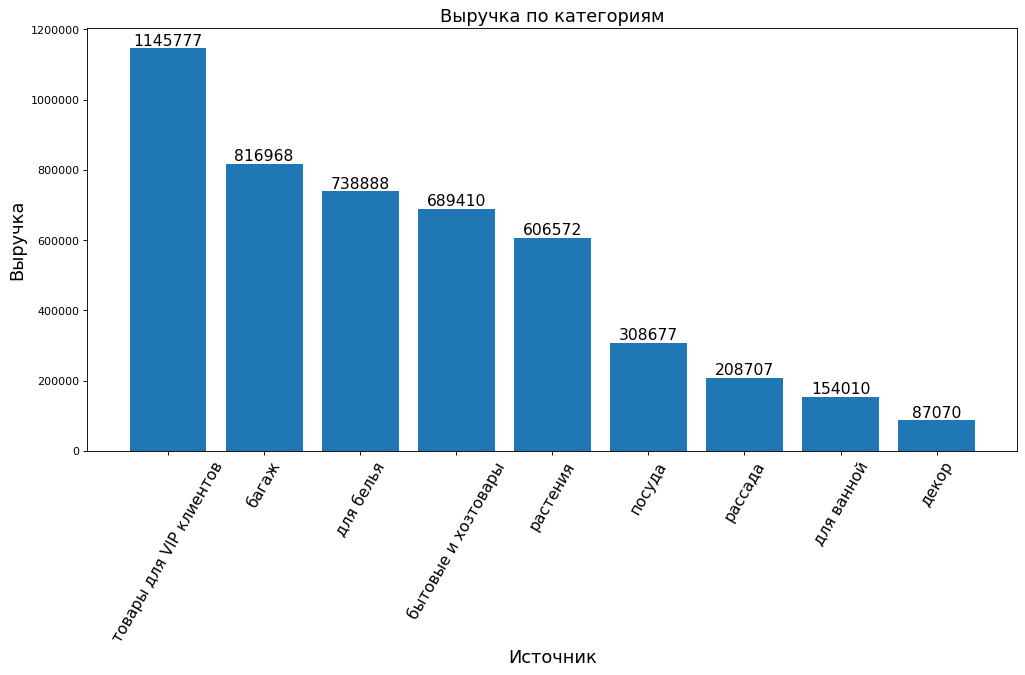

In [146]:
make_graf('Выручка по категориям',category_revenue['category'],category_revenue['summa'],'Выручка')

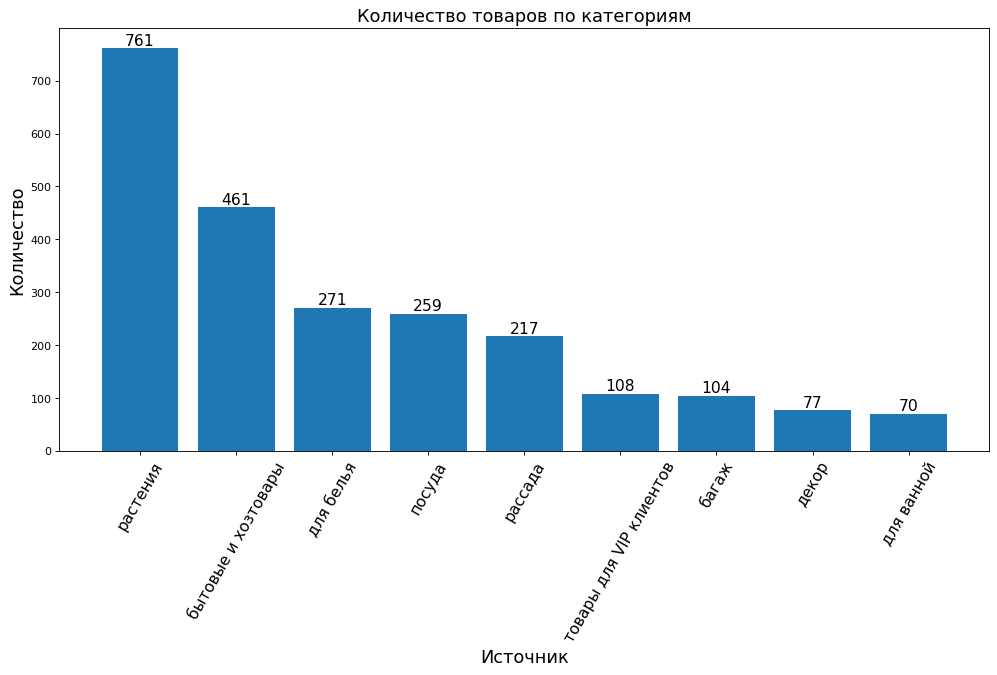

In [147]:
category_count_product=df.groupby('category').agg({'product':'nunique'}).sort_values('product',ascending=False).reset_index()
make_graf('Количество товаров по категориям',category_count_product['category'],category_count_product['product'],'Количество')

In [39]:
# посмотрим какова доля выбросов от общей выручки
print('{:.2%} доля выбросов от общей выручки'.format(
    orders_summa[orders_summa['summa']>=11275.5]['summa'].sum()/orders_summa['summa'].sum()))

29.13% доля выбросов от общей выручки


### Вывод:

1. Товары откатегоризованы. Прошу прощения, что часть была в ручную.
2. 108 товаров из категории для вип клиентов приносят больше всего выручки.
3. 104 вида багажа и второе место по выручке.
4. 271 товар из категории "для белья" замыкает тройку, оптимальности категорийных товаров по соотношению количество видов/объем выручки.
5. То, что выделил  отдельную категорию "товары для VIP клиентов" это помимо категоризации, М-маркетинг. Видя такую категорию массовый клиент, хочет быть ВИПом. Нет-нет зайдет и купит.

<a name="3.6"></a><br/>
<font size="4"><b>3.6 Частота покупок в разных категориях</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Узнаем как часто люди покупают из разных категорий товары. 

In [87]:
mass_client_category=df.query('customer_id not in @vip_clients').groupby('customer_id').agg({'category':'nunique'}).reset_index()
print('Количество категорий в которых покупает один клиент может быть от {} до {}'.format(mass_client_category['category'].min(),mass_client_category['category'].max()))

Количество категорий в которых покупает один клиент может быть от 1 до 7


In [88]:
mass_client_category.describe()

,category
count,2364.000000
mean,1.079949
std,0.345388
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


In [89]:
mass_client_category.groupby('category').agg({'customer_id':'nunique'})

,customer_id
category,
1,2212
2,125
3,21
4,4
5,1
7,1


Итак, клиенты обычно покупают в одной категории, за редкими исключениями. Надо посмотреть на тех, кто покупает из разных категорий, например в разрезе среднего чека.

In [90]:
anomal_client = mass_client_category[mass_client_category['category']>=4]['customer_id']
print('Выручка от клиентов любящих гулять по категориям составляет',df.query('customer_id in @anomal_client')['summa'].sum())

Выручка от клиентов любящих гулять по категориям составляет 89739


<a name="4.0"></a><br/>
<font size="5"><b>Шаг 4. Кластеризация. Попробуем спрогнозировать возврат покупателей.</b></font><br/>
<a name="4.1"></a><br/>
<font size="4"><b>4.1 Формирования признаков. Анализ.</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Напомню, что мы имеем.

In [91]:
print('За год наш магазин обслужил {} клиентов'.format(len(df['customer_id'].unique())))

За год наш магазин обслужил 2389 клиентов


In [92]:
list_of_clients_made_more_than_1orders=df.groupby('customer_id').agg({'order_id':'nunique'}).reset_index().query('order_id>1')['customer_id'].unique().tolist()
print(len(list_of_clients_made_more_than_1orders),'количество клиентов вернулись за повторным заказом')
print('{:.2%} доля клиентов которые вернулись за повторным заказом'.format(len(list_of_clients_made_more_than_1orders)/len(df['customer_id'].unique())))

155 количество клиентов вернулись за повторным заказом
6.49% доля клиентов которые вернулись за повторным заказом


Негусто для прогнозов, но я попробую изобразить.

In [93]:
model=df.groupby(['customer_id',]).agg({'quantity':'sum','order_id':'nunique','summa':'sum',
                                                   'product':'nunique','category':'nunique'}).reset_index()
model.rename(columns={'order_id': 'count_of_orders','category':'count_of_category','summa':'revenue','product':'count_of_product'}, inplace=True)
model['AVG_check']=model['revenue']/model['count_of_orders']
model.head()

,customer_id,quantity,count_of_orders,revenue,count_of_product,count_of_category,AVG_check
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4,1,555,4,1,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,1,1,442,1,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2,1,914,1,1,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1,1649,1,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2,1,2324,1,1,2324.0


Мы имеем 6 признаков
* quantity - количество купленого товара покупателем
* count_of_orders - количество купленого товара покупателем
* revenue - сумарная выручка от клиента
* count_of_product	- количество видов товаров в заказе
* count_of_category - количество категорий товаров в заказе
* AVG_check	 - сумарная выручка от клиента


Добавим еще 10 бинарных, присутствие в той или иной категории, и самое главное Return вернулся клиент или нет.

In [94]:
category_list=df['category'].unique().tolist()
category_list

['растения',
 'бытовые и хозтовары',
 'посуда',
 'для белья',
 'товары для VIP клиентов',
 'багаж',
 'декор',
 'рассада',
 'для ванной']

In [95]:
for name in category_list:
    model[name]=0
    list_of_clients=df.query('category==@name')['customer_id'].unique().tolist()
    for client in list_of_clients:
        index_list=model.query('customer_id==@client')[name].index.tolist()
        model.loc[index_list,name]=1

In [96]:
model['return']=0
for i in range(len(model)):
    if model.loc[i,'count_of_orders']!=1:
        model.loc[i,'return']=1
del model['customer_id']
model.head(10)

,quantity,count_of_orders,revenue,count_of_product,count_of_category,AVG_check,растения,бытовые и хозтовары,посуда,для белья,товары для VIP клиентов,багаж,декор,рассада,для ванной,return
0,4,1,555,4,1,555.0,1,0,0,0,0,0,0,0,0,0
1,1,1,442,1,1,442.0,0,0,0,1,0,0,0,0,0,0
2,2,1,914,1,1,914.0,0,1,0,0,0,0,0,0,0,0
3,1,1,1649,1,1,1649.0,0,0,0,0,0,1,0,0,0,0
4,2,1,2324,1,1,2324.0,0,1,0,0,0,0,0,0,0,0
5,12,1,1536,1,1,1536.0,0,0,0,1,0,0,0,0,0,0
6,1,1,1199,1,1,1199.0,0,0,0,0,0,0,0,0,1,0
7,1,1,937,1,1,937.0,0,0,0,1,0,0,0,0,0,0
8,1,1,134,1,1,134.0,1,0,0,0,0,0,0,0,0,0
9,1,1,112,1,1,112.0,1,0,0,0,0,0,0,0,0,0


Собрали вот такую красивую таблицу с 16 признаками.

Далее проведем анализ по величинам.

In [97]:
# посмотрим на средние значении группы которая ушла в отток
model[model['return']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,2234.0,6.299015,34.904670,1.0,1.0,1.0,3.0,1000.0
count_of_orders,2234.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
revenue,2234.0,1817.012086,14758.550938,14.0,314.0,734.0,1649.0,675000.0
count_of_product,2234.0,1.739481,2.937960,1.0,1.0,1.0,1.0,51.0
count_of_category,2234.0,1.064458,0.295297,1.0,1.0,1.0,1.0,4.0
AVG_check,2234.0,1817.012086,14758.550938,14.0,314.0,734.0,1649.0,675000.0
растения,2234.0,0.297672,0.457337,0.0,0.0,0.0,1.0,1.0
бытовые и хозтовары,2234.0,0.205013,0.403802,0.0,0.0,0.0,0.0,1.0
посуда,2234.0,0.113697,0.317514,0.0,0.0,0.0,0.0,1.0
для белья,2234.0,0.188004,0.390803,0.0,0.0,0.0,0.0,1.0


In [98]:
# посмотрим на средние значении группы которая ушла вернулась за покупками
model[model['return']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,155.0,15.361290,44.305006,2.0,2.00,4.0,13.00,409.0
count_of_orders,155.0,3.329032,10.345405,2.0,2.00,2.0,2.00,126.0
revenue,155.0,4495.961290,15275.945151,118.0,621.00,1352.0,3031.50,166988.0
count_of_product,155.0,4.974194,11.870485,1.0,2.00,2.0,3.00,130.0
count_of_category,155.0,1.387097,0.921511,1.0,1.00,1.0,2.00,8.0
AVG_check,155.0,1308.320345,2663.831417,59.0,298.25,594.0,1308.25,26616.0
растения,155.0,0.477419,0.501109,0.0,0.00,0.0,1.00,1.0
бытовые и хозтовары,155.0,0.232258,0.423642,0.0,0.00,0.0,0.00,1.0
посуда,155.0,0.122581,0.329018,0.0,0.00,0.0,0.00,1.0
для белья,155.0,0.180645,0.385971,0.0,0.00,0.0,0.00,1.0


In [99]:
# разделим данные по признаку возврата
model_return=model[model['return']==1].reset_index(drop=True)
model_noreturn=model[model['return']==0].reset_index(drop=True)

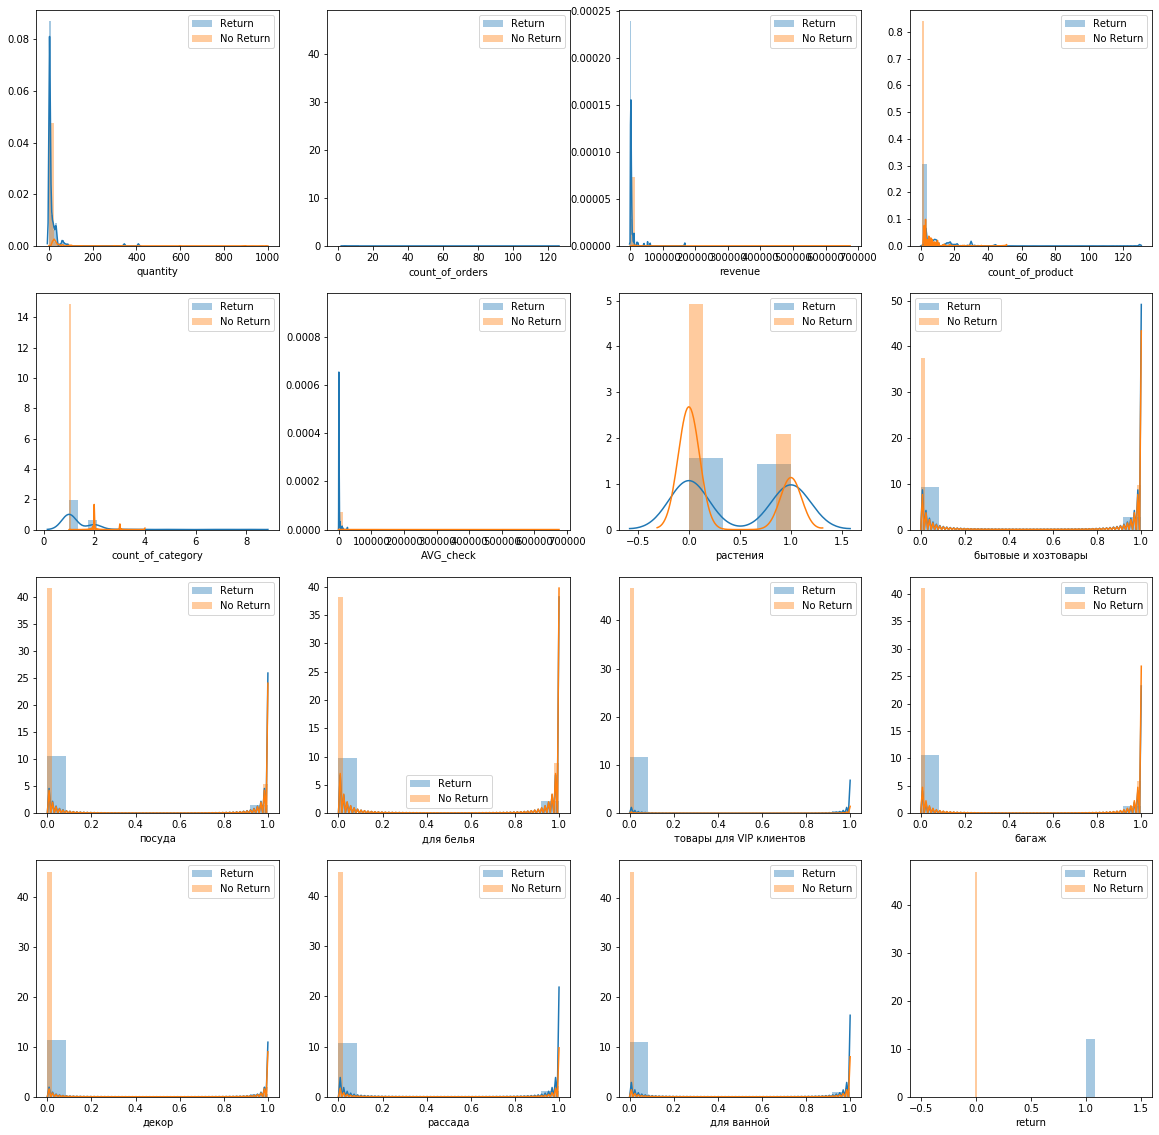

In [107]:
# построим гистограммы (дисплоты) для следующих признаков 
# посмотрим на распределения
fig, axs = plt.subplots(4,4, figsize=(20, 20))
ax_iter = iter(axs.flat)
for col in model.columns:
    ax = next(ax_iter)
    sns.distplot(model_return[col], ax=ax)
    sns.distplot(model_noreturn[col],ax=ax)
    ax.legend(labels=['Return', 'No Return'])

(16, 0)

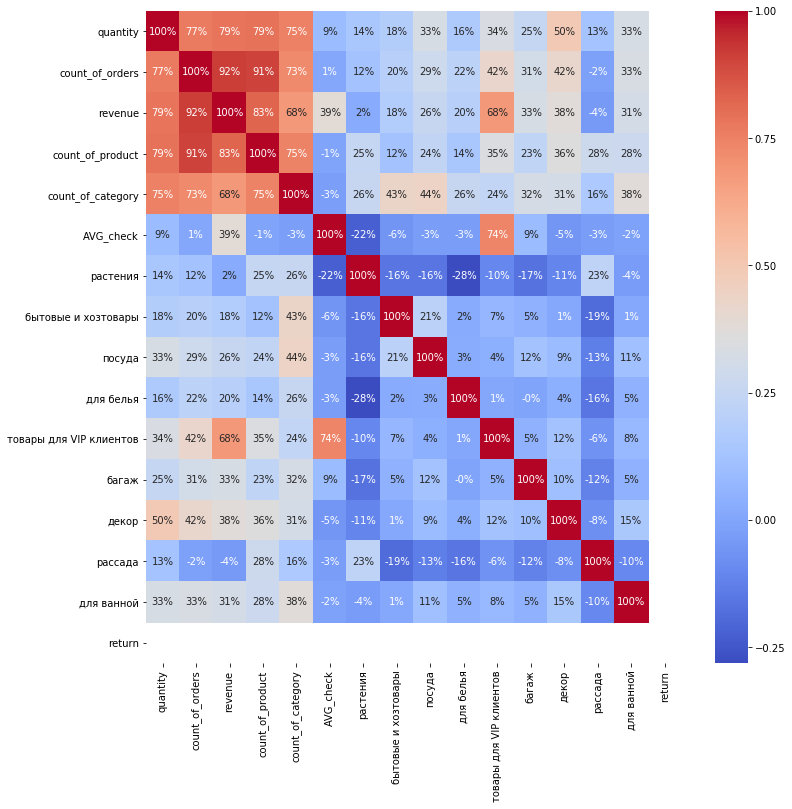

In [108]:
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(model_return.corr(), cmap="coolwarm", annot=True,ax=ax,fmt='.0%')
ax.set_ylim(16,0)

Коррелируют только 5 количественных признаков.

Проблема мультиколинеарности присуща только регрессионным моделям. А в классификации наоборот, чем больше признаков, тем лучше. Поэтому ни один из признаков удалять не будем.

<a name="4.2"></a><br/>
<font size="4"><b>4.2 Стандартизация. Дендограмма.Кластеризация.</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Стандартизация приведёт значения признаков к виду стандартного нормального распределения: значения будут центрированы относительно 0, а средний разброс данных составит 1. 
Стандартизируем данные:

In [109]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
x_sc = sc.fit_transform(model.drop(columns = ['return']))# обучаем нормализатор и преобразуем набор данных

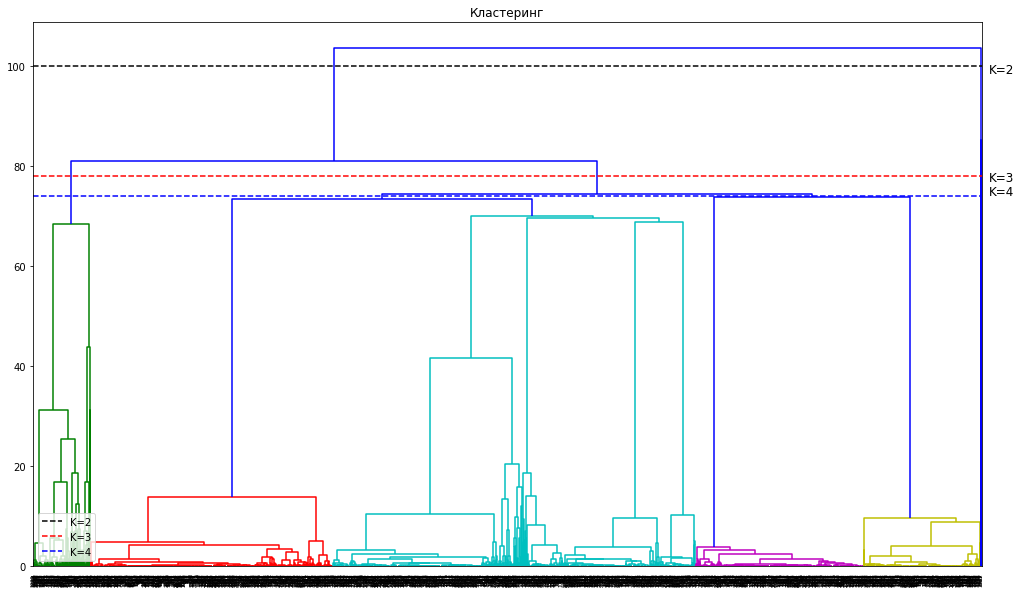

1.2609590411186218

In [110]:
start_1 = time.time()
linked = linkage(x_sc, method = 'ward')
fig, ax = plt.subplots(figsize=(17,10))
dendrogram(linked, orientation='top')

plt.axhline(y=100, color='black', linestyle='--', label='K=2')
plt.axhline(y=78, color='red', linestyle='--',label='K=3')
plt.axhline(y=74, color='blue', linestyle='--',label='K=4')

fig.text(0.906, 0.81, 'K=2', fontsize='large')
fig.text(0.906, 0.66, 'K=3', fontsize='large')
fig.text(0.906, 0.64, 'K=4', fontsize='large')

plt.legend()
plt.title('Кластеринг')
plt.show()
end_1 = time.time()
(end_1-start_1)/60

По дендрограмме можно визуально оценить, сколько кластеров должно быть.
Предложенное оптимальное число кластеров 5 — пять разных цветов на графике.

А также прикинуть расстояние, после которого мы перестаём объединять объекты. Значение K — это число линий, пересечённых пунктирной линией. 

In [111]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5,random_state=88)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров

# сохраняем метки кластера в поле нашего датасета
model['cluster_km'] = labels

In [112]:
# выводим статистику по средним значениям наших признаков по кластеру
model_new=model.groupby('cluster_km').mean().T
model.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
quantity,18.523438,5.580612,1000.0,1.653199,551.000000
count_of_orders,1.351562,1.070918,1.0,1.060606,54.000000
revenue,2370.359375,1360.211735,675000.0,2589.535354,114188.666667
count_of_product,9.812500,1.478061,1.0,1.067340,62.000000
count_of_category,1.835938,1.038776,1.0,1.023569,5.666667
AVG_check,1984.518821,1267.918367,675000.0,2458.057239,39271.081481
растения,0.617188,0.334694,0.0,0.006734,0.666667
бытовые и хозтовары,0.156250,0.239286,0.0,0.010101,0.666667
посуда,0.062500,0.133673,0.0,0.003367,0.666667
для белья,0.015625,0.226531,0.0,0.000000,0.666667


3-й кластер идеальная модель (видимо избыток переобученния).

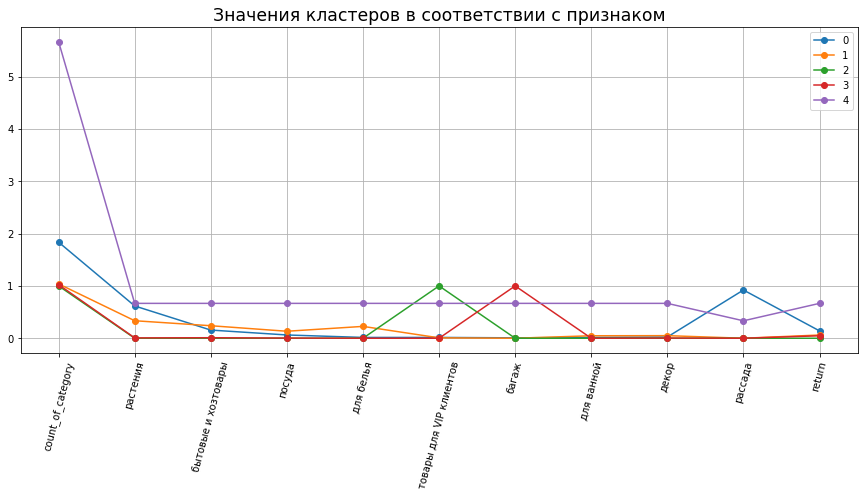

In [113]:
col_name=['count_of_category',  'растения', 'бытовые и хозтовары',
       'посуда', 'для белья', 'товары для VIP клиентов', 'багаж', 'для ванной',
       'декор', 'рассада', 'return']

fig, ax = plt.subplots(figsize=(15,6))
mode_dict={}
for name in [0,1,2,3,4]:
    for col in col_name:
        mode_dict[col]=model_new.loc[col,name]
    plt.plot(list(mode_dict.keys()), list(mode_dict.values()), 'o-',label=name)
    ax.set_xticklabels(list(mode_dict.keys()),rotation=75)
    plt.legend(loc='upper right')
plt.title('Значения кластеров в соответствии с признаком',fontsize='xx-large')
plt.grid(True)

Чтобы не описывать словами, есть график на котором отображены некоторые признаки. 
Чем ближе значения кластеров к красной линии, тем больше вероятность возвращения клиента.
В своё оправдание могу лишь сказать, что строить прогнозы на маленьком количестве клиентов, да при том, что рассматриваемый период только один год - это мягко говоря не очень =)
Да клиенты, которые вернулись 6,5%, что на них прогнозировать отток лучше прогнозируется, но не возврат.
Илон согласен=)

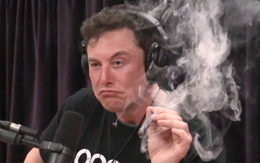

<a name="5.0"></a><br/>
<font size="5"><b>Шаг 5. Формулировка и проверка статистических гипотез</b></font><br/>
<a name="5.1"></a><br/>
<font size="4"><b>5.1 Средние чеки покупателей одновременно покупающих в разных категориях, не отличаются, от средних чеков покупателей из одной категории</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Сформируем выборки по клиентам, которые покупали из разных категорий и из одной.
Посмотрим статистически имеются ли статистически значимые различия.

In [114]:
list_of_clients_buy_in_1cat=mass_client_category[mass_client_category['category']==1]['customer_id'].tolist()
list_of_clients_2cat=mass_client_category[mass_client_category['category']==2]['customer_id'].tolist()
list_of_clients_3cat=mass_client_category[mass_client_category['category']==3]['customer_id'].tolist()
list_of_clients_buy_more_than_1cat=list_of_clients_2cat+list_of_clients_3cat

На вид не очень нормальное распределение, видны выбросы.

****************************************************************************************************
Клиенты покупающие только в одной категории средний чек 
 count    2212.00000 
mean     1223.68799 
std      1523.08616 
min      14.00000   
25%      298.75000  
50%      697.00000  
75%      1565.12500 
max      11250.00000
Name: AVG_check, dtype: float64
****************************************************************************************************
Клиенты покупающие из разных категорий товаров средний чек 
 count    146.000000  
mean     1572.783154 
std      1596.651659 
min      115.500000  
25%      580.500000  
50%      1086.625000 
75%      1900.000000 
max      10656.000000
Name: AVG_check, dtype: float64


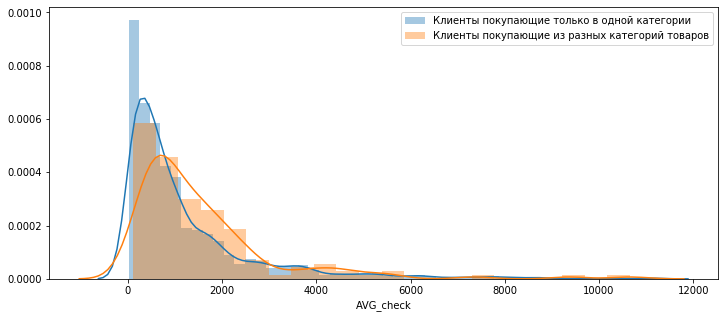

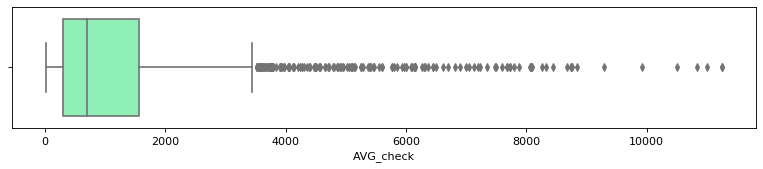

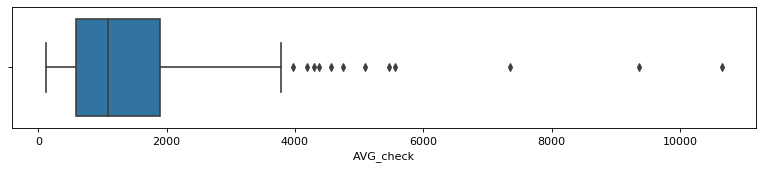

Cрежем по верхним усам выбросы, предварительно проверив, чтобы количество выбросов было меньше 10%
Клиенты покупающие только в одной категории процентили по среднему чеку [2999.  4291.1]
Клиенты покупающие из разных категорий товаров процентили по среднему чеку [3241.   4513.25]


In [115]:
def make_analyz(list_1,name1,list_2,name2):
    list1=list_1
    list2=list_2
    group1=df.query('customer_id in @list1').groupby('customer_id').agg({'order_id':'nunique','summa':'sum'}).reset_index()
    group1['AVG_check']=group1['summa']/group1['order_id']
    group2=df.query('customer_id in @list2').groupby('customer_id').agg({'order_id':'nunique','summa':'sum'}).reset_index()
    group2['AVG_check']=group2['summa']/group2['order_id']
    print('*'*100)
    print(name1,'средний чек','\n',group1['AVG_check'].describe())
    print('*'*100)
    print(name2,'средний чек','\n',group2['AVG_check'].describe())
    plt.figure(figsize=(12,5))
    sns.distplot(group1['AVG_check'], label=name1)
    sns.distplot(group2['AVG_check'], label=name2)
    plt.legend()
    plt.show()
    plt.figure(figsize=(12,2), dpi= 80)
    sns.boxplot(group1['AVG_check'],palette='rainbow')
    plt.figure(figsize=(12,2), dpi= 80)
    sns.boxplot(group2['AVG_check'])
    plt.show()
    print('Cрежем по верхним усам выбросы, предварительно проверив, чтобы количество выбросов было меньше 10%')
    print(name1,'процентили по среднему чеку', np.percentile(group1['AVG_check'], [90, 95]))
    print(name2,'процентили по среднему чеку', np.percentile(group2['AVG_check'], [90, 95]))
make_analyz(list_of_clients_buy_in_1cat,'Клиенты покупающие только в одной категории',list_of_clients_buy_more_than_1cat,'Клиенты покупающие из разных категорий товаров')

<font color=blue>Избавимся от выбросов перестроим дисплоты, для этого напишем новую функцию make_analyz2</font>

In [116]:
def make_analyz2(list_1,porog_1,name1,list_2,porog_2,name2):
    list1=list_1
    list2=list_2
    porog1=porog_1
    porog2=porog_2
    group1=df.query('customer_id in @list1').groupby('customer_id').agg({'order_id':'nunique','summa':'sum'}).reset_index()
    group1['AVG_check']=group1['summa']/group1['order_id']
    group2=df.query('customer_id in @list2').groupby('customer_id').agg({'order_id':'nunique','summa':'sum'}).reset_index()
    group2['AVG_check']=group2['summa']/group2['order_id']
    group1=group1[group1['AVG_check'] < porog1 ].reset_index(drop=True)
    group2=group2[group2['AVG_check'] < porog2 ].reset_index(drop=True)
    print('*'*100)
    print(name1,'средний чек','\n',group1['AVG_check'].describe())
    print('*'*100)
    print(name2,'средний чек','\n',group2['AVG_check'].describe())
    plt.figure(figsize=(12,5))
    sns.distplot(group1['AVG_check'], label=name1)
    sns.distplot(group2['AVG_check'], label=name2)
    plt.legend()
    plt.show()

****************************************************************************************************
Клиенты покупающие только в одной категории средний чек 
 count    2033.000000
mean     860.038613 
std      776.372276 
min      14.000000  
25%      254.000000 
50%      600.000000 
75%      1187.000000
max      3449.000000
Name: AVG_check, dtype: float64
****************************************************************************************************
Клиенты покупающие из разных категорий товаров средний чек 
 count    134.000000 
mean     1194.002541
std      792.305528 
min      115.500000 
25%      564.375000 
50%      1013.500000
75%      1676.500000
max      3776.000000
Name: AVG_check, dtype: float64


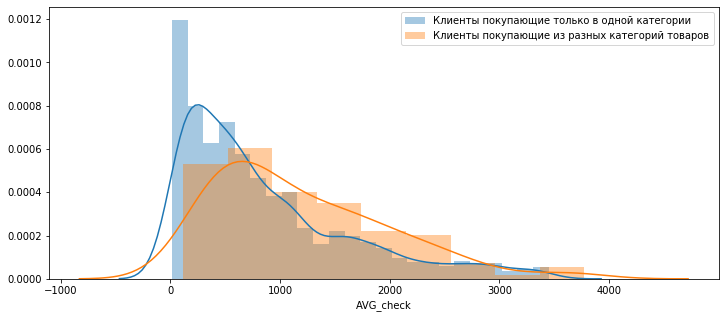

In [117]:
make_analyz2(list_of_clients_buy_in_1cat,3500,'Клиенты покупающие только в одной категории',list_of_clients_buy_more_than_1cat,3800,'Клиенты покупающие из разных категорий товаров')

In [118]:
def make_ttest(list_1,porog_1,list_2,porog_2,alpha):
    list1=list_1
    list2=list_2
    porog1=porog_1
    porog2=porog_2
    group1=df.query('customer_id in @list1').groupby('customer_id').agg({'order_id':'nunique','summa':'sum'}).reset_index()
    group1['AVG_check']=group1['summa']/group1['order_id']
    group2=df.query('customer_id in @list2').groupby('customer_id').agg({'order_id':'nunique','summa':'sum'}).reset_index()
    group2['AVG_check']=group2['summa']/group2['order_id']
    group1=group1[group1['AVG_check'] < porog1 ]['AVG_check'].reset_index(drop=True)
    group2=group2[group2['AVG_check'] < porog2 ]['AVG_check'].reset_index(drop=True)
    alph = alpha # критический уровень статистической значимости
    results = st.ttest_ind(group1,group2)
    print('p-значение: ', results.pvalue)
    if (results.pvalue < alph):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [119]:
make_ttest(list_of_clients_buy_in_1cat,3500,list_of_clients_buy_more_than_1cat,3800,0.05)

p-значение:  1.5589532587245912e-06
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Генеральные совокупности величин различны, средние чеки групп различаются.

<a name="5.2"></a><br/>
<font size="4"><b>5.2 Средние чеки покупателей, которые покупают больше одного раза не отличаются, от средних чеков покупателей совершивших один заказ</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [120]:
list_of_clients_made_more_than_1orders=df.query('customer_id not in @vip_clients').groupby('customer_id').agg(
    {'order_id':'nunique'}).reset_index().query('order_id>1')['customer_id'].unique().tolist()
print(len(list_of_clients_made_more_than_1orders),'клиентов сделали больше одного заказа')

150 клиентов сделали больше одного заказа


In [121]:
list_of_clients_made_only_1order=df.query('customer_id not in @vip_clients').groupby('customer_id').agg(
    {'order_id':'nunique'}).reset_index().query('order_id==1')['customer_id'].unique().tolist()
print(len(list_of_clients_made_only_1order),'клиентов сделавших один заказ')

2214 клиентов сделавших один заказ


****************************************************************************************************
клиенты сделавших один заказ средний чек 
 count    2214.000000 
mean     1266.500452 
std      1554.650408 
min      14.000000   
25%      312.000000  
50%      734.000000  
75%      1606.000000 
max      11250.000000
Name: AVG_check, dtype: float64
****************************************************************************************************
клиенты сделали больше одного заказа средний чек 
 count    150.000000 
mean     948.409013 
std      1026.640341
min      59.000000  
25%      295.375000 
50%      572.250000 
75%      1255.125000
max      5774.000000
Name: AVG_check, dtype: float64


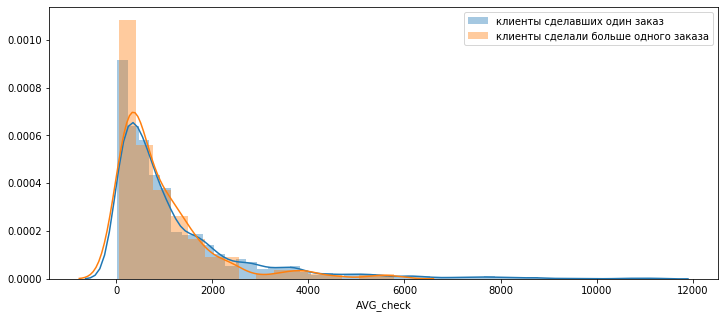

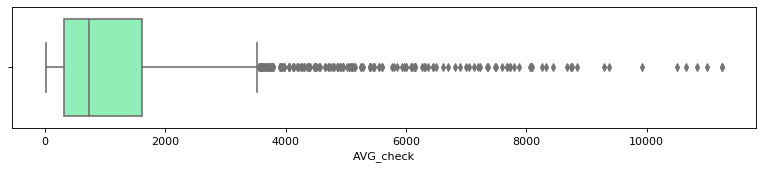

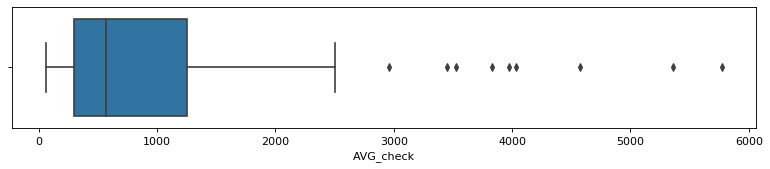

Cрежем по верхним усам выбросы, предварительно проверив, чтобы количество выбросов было меньше 10%
клиенты сделавших один заказ процентили по среднему чеку [3105.1 4478.4]
клиенты сделали больше одного заказа процентили по среднему чеку [2086.85  3229.625]


In [122]:
make_analyz(list_of_clients_made_only_1order,'клиенты сделавших один заказ',list_of_clients_made_more_than_1orders,'клиенты сделали больше одного заказа')

****************************************************************************************************
клиенты сделавших один заказ средний чек 
 count    2073.000000
mean     947.682103 
std      875.419570 
min      14.000000  
25%      296.000000 
50%      658.000000 
75%      1348.000000
max      3787.000000
Name: AVG_check, dtype: float64
****************************************************************************************************
клиенты сделали больше одного заказа средний чек 
 count    140.000000 
mean     730.539419 
std      588.585436 
min      59.000000  
25%      287.000000 
50%      543.500000 
75%      1087.000000
max      2460.000000
Name: AVG_check, dtype: float64


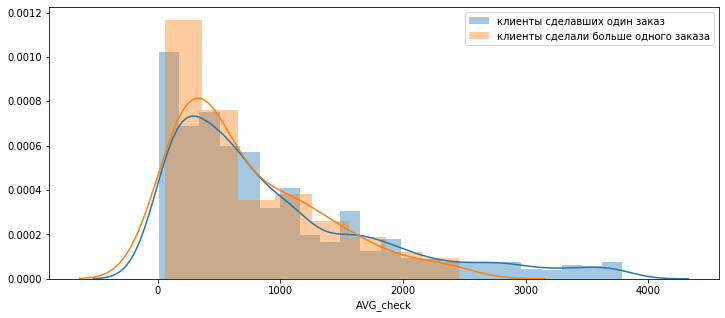

In [123]:
make_analyz2(list_of_clients_made_only_1order,3800,'клиенты сделавших один заказ',list_of_clients_made_more_than_1orders,2500,'клиенты сделали больше одного заказа')

In [124]:
make_ttest(list_of_clients_made_only_1order,3800,list_of_clients_made_more_than_1orders,2500,0.05)

p-значение:  0.003880431120518437
Отвергаем нулевую гипотезу


<font color=blue>Отвергаем нулевую гипотезу, означает, что генеральные совокупности различны. Cредние чеки групп различаются.</font>

<a name="5.3"></a><br/>
<font size="4"><b>5.3 Средние чеки покупателей, которые покупают в выходные и будни не отличаются</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [125]:
weekdaylist=[0,1,2,3,4]
list_of_clients_buy_weekday=df.query('customer_id not in @vip_clients & weekday in @weekdaylist').groupby('customer_id').agg(
    {'order_id':'nunique'}).reset_index()['customer_id'].unique().tolist()
print(len(list_of_clients_buy_weekday),'клиентов покупающих в будни')
list_of_clients_buy_weekend=df.query('customer_id not in @vip_clients & weekday not in @weekdaylist').groupby('customer_id').agg(
    {'order_id':'nunique'}).reset_index()['customer_id'].unique().tolist()
print(len(list_of_clients_buy_weekend),'клиентов покупающих в выходные')

1839 клиентов покупающих в будни
550 клиентов покупающих в выходные


Проверим, чтобы пользователи, которые покупали в выходные не было среди клиентов будничных клиентов.

In [126]:
list_of_clients_buy_weekend2=[]
for name in list_of_clients_buy_weekend:
    if name in list_of_clients_buy_weekday:
        continue
    else:
        list_of_clients_buy_weekend2.append(name)
print(len(list_of_clients_buy_weekend2),'клиентов покупающих в выходные')

525 клиентов покупающих в выходные


****************************************************************************************************
клиенты покупающие в будни средний чек 
 count    1839.00000 
mean     1272.29537 
std      1589.07464 
min      14.00000   
25%      314.00000  
50%      727.00000  
75%      1574.00000 
max      11250.00000
Name: AVG_check, dtype: float64
****************************************************************************************************
клиенты покупающие в выходные средний чек 
 count    525.000000 
mean     1155.318413
std      1290.831689
min      22.000000  
25%      298.000000 
50%      680.000000 
75%      1574.000000
max      8437.000000
Name: AVG_check, dtype: float64


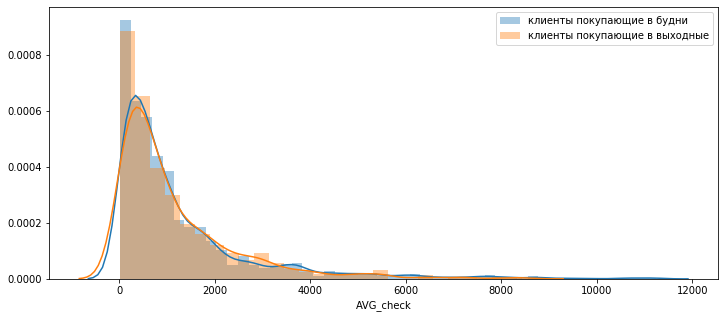

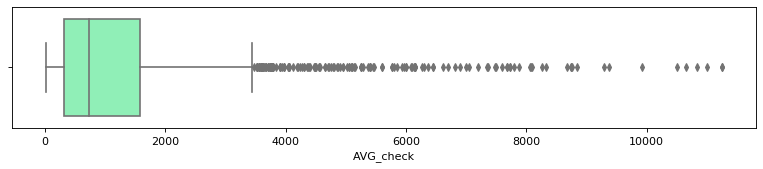

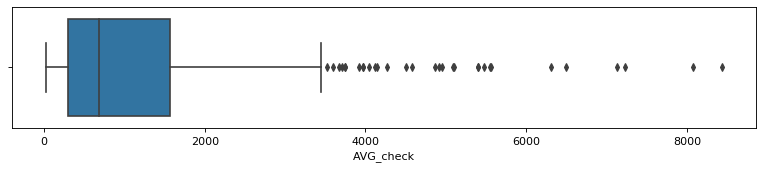

Cрежем по верхним усам выбросы, предварительно проверив, чтобы количество выбросов было меньше 10%
клиенты покупающие в будни процентили по среднему чеку [3204.8 4505.8]
клиенты покупающие в выходные процентили по среднему чеку [2848.  3739.4]


In [127]:
make_analyz(list_of_clients_buy_weekday,'клиенты покупающие в будни',list_of_clients_buy_weekend2,'клиенты покупающие в выходные')

****************************************************************************************************
клиенты покупающие в будни средний чек 
 count    1717.000000
mean     935.477200 
std      866.346683 
min      14.000000  
25%      299.000000 
50%      652.000000 
75%      1275.000000
max      3787.000000
Name: AVG_check, dtype: float64
****************************************************************************************************
клиенты покупающие в выходные средний чек 
 count    500.000000 
mean     946.088333 
std      865.517279 
min      22.000000  
25%      275.250000 
50%      637.000000 
75%      1374.000000
max      3749.000000
Name: AVG_check, dtype: float64


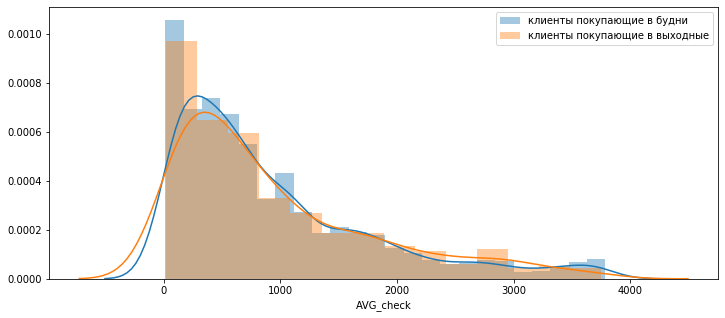

In [128]:
make_analyz2(list_of_clients_buy_weekday,3800,'клиенты покупающие в будни',list_of_clients_buy_weekend2,3800,'клиенты покупающие в выходные')

In [129]:
make_ttest(list_of_clients_buy_weekday,3800,list_of_clients_buy_weekend2,3800,0.05)

p-значение:  0.8095198020965977
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу. Генеральные совокупности величин равны. Средние чеки групп равны.

<a name="6.0"></a><br/>
<font size="5"><b>Шаг 6. Выводы по проекту</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

<br/>
<div class="col-md-3">
  <ul class="nav nav-pills nav-stacked"> 
    <li class="active"><a class="nav-link" id="home-tab" data-toggle="pill" href="#output2" role="tab" aria-controls="output2" aria-selected="false">Баг-репорт</a></li>
    <li><a class="nav-link" id="profile-tab" data-toggle="pill" href="#output3" role="tab" aria-controls="output3" aria-selected="false">Сегментация</a></li>
          <li><a class="nav-link" id="profile-tab" data-toggle="pill" href="#output4" role="tab" aria-controls="output4" aria-selected="false">Результаты выдвинутых гипотез</a></li>
             <li><a class="nav-link" id="contact-tab" data-toggle="pill" href="#output" role="tab" aria-controls="output" aria-selected="false">Рекомендации</a></li>
      <li><a class="nav-link" id="contact-tab" data-toggle="pill" href="#output5" role="tab" aria-controls="output5" aria-selected="false">Используемые источники</a></li>
   
</ul>
</div>

<div class="tab-content">
<div id="output2" class="tab-pane fade in active">
    <h3 style="margin-left:270px">Баг-репорт</h3>
    <p style="margin-left:270px">
        
Баг-репорт №1: Один и тот же заказ могут делать разные клиенты. Природа происхождения бага не известна. Список аномальных заказов в файле anomaly_orders_1.
<br><br>
Баг-репорт №2: Один и тот же заказ может быть совершен в разные даты. Предположу, что клиент не мог справится с заказом в один день, поэтому растянул удовольствие от выбора на не сколько дней. Необходимо четко определять даты заказов,чтобы не было искажения метрик.
Список аномальных заказов в файле anomaly_orders_2<br>
</p>
  </div>

  <div id="output3" class="tab-pane fade">
      <h3 style="margin-left:270px">Сегментация</h3>
      <p>
    <p style="margin-left:270px"> 
Выделено 9 категорий товаров 'товары для VIP клиентов', 'багаж', 'бытовые и хозтовары', 'для белья', 'растения',
 'посуда', 'рассада', 'для ванной', 'декор'<br> <br>
108 товаров из категории для вип клиентов приносят больше всего выручки.<br> <br>
104 вида багажа и второе место по выручке.<br> <br>
271 товар из категории "для белья" замыкает тройку, оптимальности категорийных товаров по соотношению количество видов/объем выручки.<br> <br>
То, что выделил  отдельную категорию "товары для VIP клиентов" это помимо категоризации, М-маркетинг. Видя такую категорию массовый клиент, хочет быть ВИПом. Нет-нет зайдет и купит.<br> <br>
            </p>
  </div>

  <div id="output4" class="tab-pane fade">
      <h3 style="margin-left:270px">Результаты выдвинутых гипотез</h3>
      <p>
    <p style="margin-left:270px">Опровергли гипотезу, о равенстве cредние чеков, клиентов, покупающие из разных категорий - средний чек выше.<br><br>Опровергли гипотезу, о равенстве cредние чеков, клиентов, которые сделали только по одному заказу - средний чек выше.<br><br>Не получилось отвергнуть нулевую гипотезу, о том, что генеральные совокупности величин cредних чеков клиентов покупающих в будни и выходные различны.
    
  </p>
  </div>
    
                    
<div id="output" class="tab-pane fade">
      <h3 style="margin-left:270px">Рекомендации</h3>
      <p>
        <p style="margin-left:270px">  
          Заказы от vip_clients дали нам 29% от суммарной выручки за год. Необходимо найти этих клиентов,и попросить еще раз купить. Стоит таких клиентов записать в касту и сделать специальные предложения для них<br><br>
Сегментация товаров позволила нам выделит три категории товаров,которые приносят нам львиную долю всей выручки.
<br><br>Также эти категории оптимальны по соотношению количество видов товаров/объем выручки. Это говорит о том,что мы можем сократить расходы на склады, и персонал. Сэкономленные деньги пустить на привлечении новых клиентов. <br><br>Также можно расширить ассортимент по данным категориям товаров,еще раз перечислю:
            "для вип клиентов", "багаж", "для белья"<br><br>

</p>
            </div>
            <div id="output5" class="tab-pane fade">
      <h3 style="margin-left:270px">Используемые источники</h3> 
      <p>
        <p style="margin-left:270px">  
         <a> https://github.com/bayk0v/ - свои тетрадки по ранее выполненым проектам</a><br>
         <a> https://praktikum.yandex.ru/profile/data-analyst/ - материалы Я.Практикум</a> <br>
         <a> https://stackoverflow.com/questions/43431347/python-dictionary-plot-matplotlib - график по словарю</a><br>
         <a> https://ru.wikipedia.org/w/index.php?title=Категория:Растения_по_алфавиту&from=А парсил вики по растениям</a><br>
         <a> http://www.obradoval.ru/encyclopedia-cvetov/ - парсил энциклопедию по растениям</a><br>
         <a> https://ru.wikipedia.org/wiki/Категория:Посуда - парсил вики по наименованию посуды</a><br>
</p>
</div>
</div>
        